In [1]:
# Import libaries
%matplotlib inline
from scipy.optimize import curve_fit
import time as time
# General data management
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc, rcParams

import seaborn as sns
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn import ensemble
from xgboost import plot_tree
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# import pydo
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
# Machine learning & model visualization tools
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_gamma_deviance, mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from numpy import cov
from scipy.stats import pearsonr
from scipy import ndimage, misc
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy import stats 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# from sklearn.externals import joblib
# Miscellaneous
import os
import io
import pydot
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras import backend as BK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#import statsmodels.api as sm
#import statsmodels.formula.api as smf

#from bioinfokit.analys import stat
#from sklearn.inspection import partial_dependence, plot_partial_dependence

from progressbar import ProgressBar
pbar = ProgressBar()
import itertools
global_split_rand = 411

2023-06-20 12:35:43.325627: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Text(0.5, 0, '!!!Ariaaaal')

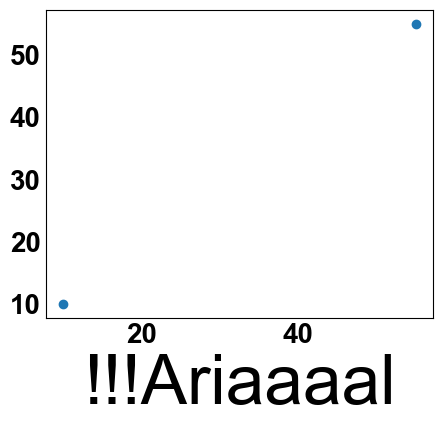

In [2]:
# check the font for figures !!!!!!!!!!!!!!!!!!!!!
# switch to Arial
# if not working in Linux: delet ~/.catch/matplotlib
plt.rcParams["font.family"] = "Arial"
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.fonttype'] = 42
mpl.font_manager.FontManager()

rc('font', weight='bold')
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter([10, 55], [10, 55])
ax.tick_params(axis='both', length=0, width=1.5, colors='black', grid_alpha=0, labelsize=20)
plt.xlabel('!!!Ariaaaal', fontname='Arial', fontsize=50)

In [3]:
# proxy properties
# read the input data
df = pd.read_csv('FJH_ML_Final_simulation.csv', header=1)
df_dummy = pd.get_dummies(df)

df['Norm_charge_tot'] = df['Charge_Tot']/(df['Mass'])*1000
df['Norm_I_Max'] = df['I_Max']/df['Mass']*1000
df['charge_density'] = df['Voltage']*df['Cap']/df['Mass']
df['Final_Current_Percent'] = df['I_Final']/df['I_Max']

Norm_I_Max = np.array (df['Norm_I_Max']).reshape(-1, 1)
Final_Current_Percent  = np.array (df['Final_Current_Percent']).reshape(-1, 1)
Norm_charge_tot  = np.array (df['Norm_charge_tot']).reshape(-1, 1)
# final prediction, yield of Graphene
df['Graphene_Yield'] = 100*df['Graphene_Yield']
Graphene_Yield = np.array (df['Graphene_Yield']).reshape(-1, 1)
Graphene_Yield = np.array (df['Graphene_Yield']).reshape(-1, 1)

Init_R = np.array (df['Init_R']).reshape (-1, 1)
Res_Drop = np.array (df['Res_Drop']).reshape (-1, 1)
Volt_Drop = np.array (df['Volt_Drop']).reshape (-1, 1)
Mass = np.array (df['Mass']).reshape(-1, 1)

# only process parameters that are in BO prediction
Pretreat_voltage = np.array (df['Pretreat_voltage']).reshape(-1, 1)
pulsetime = np.array (df['PulseTime']).reshape(-1, 1)
charge_denisty = np.array (df['charge_density']).reshape(-1, 1)

In [4]:
# rem. 90 dataset
features_dimred = np.concatenate ((np.array (df['Res_Drop']).reshape(-1, 1),
                                   np.array (df['Volt_Drop']).reshape(-1, 1),
                                   10*np.array (df['I_Max']).reshape(-1, 1),
                                   np.array (df['Norm_I_Max']).reshape(-1, 1), 
                                   np.array (df['Charge_Tot']).reshape(-1, 1), 
                                   #np.array (df['I_Final']).reshape(-1, 1), 
                                   np.array (df['TwoDtoG']).reshape(-1, 1),
                                   np.array (df['DtoG']).reshape(-1, 1),
                                   np.array (df['FWHM_2D']).reshape(-1, 1),
                                   100*np.array (df['Graphene_Yield']).reshape(-1, 1),
                                   100*np.array (df['Yield_Per']).reshape(-1, 1) # convert to %
                                   ), axis=1)

features_dimred_pca = PCA(n_components=6).fit_transform(features_dimred)
tSNE_embedded = TSNE(init='pca', n_iter=10000,learning_rate='auto', n_jobs=-1,
                    perplexity=12, random_state=4, verbose=1).fit_transform(features_dimred)


df['tsne1'] = tSNE_embedded[:, 0]
df['tsne2'] = tSNE_embedded[:, 1]

[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 173 samples in 0.000s...
[t-SNE] Computed neighbors for 173 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 173 / 173
[t-SNE] Mean sigma: 711.348554
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.424801
[t-SNE] KL divergence after 3200 iterations: 0.310633


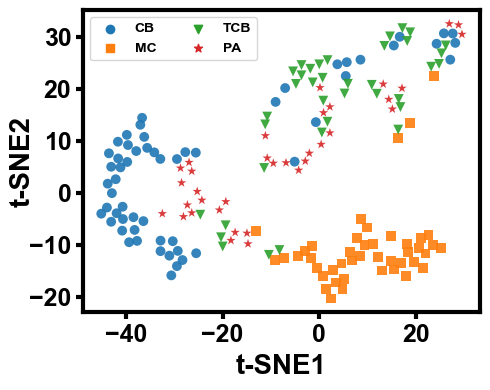

In [5]:
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
#['*', 's', 'o', 'v']
sns.scatterplot(data=df, x='tsne1', y='tsne2', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor='None',
                style='Material', alpha=0.9, s=50)

ax.set_xlabel('t-SNE1', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('t-SNE2', fontsize='20', fontname='Arial', fontweight='bold', labelpad=-5)

ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=1, labelsize='18')

[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend(ncol=2, loc='upper left')
plt.tight_layout()
#plt.title ('per {}, rand {}'.format(per, rand))
#plt.ylim(-25, 45)
plt.savefig('./Fig1/fig1j_tsne.jpeg', dpi=500)

In [6]:
# type of material
Material_CB = np.array (df_dummy['Material_CB']).reshape(-1, 1)
Material_MC = np.array (df_dummy['Material_MC']).reshape(-1, 1) 
Material_PA = np.array (df_dummy['Material_PA']).reshape(-1, 1)
Material_TCB = np.array (df_dummy['Material_TCB']).reshape(-1, 1)
material_type = np.concatenate ((Material_CB, Material_MC, Material_PA, Material_TCB), axis=1)

material_matrix = np.concatenate((np.array (df_dummy['Material_CB']).reshape([-1, 1]), 
                                  np.array (df_dummy['Material_MC']).reshape([-1, 1]),
                                  np.array (df_dummy['Material_PA']).reshape([-1, 1]),
                                  np.array (df_dummy['Material_TCB']).reshape([-1, 1])), axis=1)
material_matrix = np.array (material_matrix)

In [7]:
# physical properties of precursor received from Kevin
CB_ps_res_sa_sp2 = [45, 2.8, 1750, 41.2]
MC_ps_res_sa_sp2 = [150, 0.4, 18, 45.9]
PA_ps_res_sa_sp2 = [125, 7.2, 62, 42.4]
TCB_ps_res_sa_sp2 = [106, 6.3, 74, 30.6]
CB_MC_PA_TCB_ps_res_sa_sp2 = np.concatenate ([CB_ps_res_sa_sp2,
                 MC_ps_res_sa_sp2,
                 PA_ps_res_sa_sp2,
                 TCB_ps_res_sa_sp2], axis=0).reshape(4,4)
X_CB_MC_PA_TCB_ps_res_sa_sp2 = np.matmul(material_matrix, CB_MC_PA_TCB_ps_res_sa_sp2)

In [8]:
# type of Atmosphere
Atmosphere_air = np.array (df_dummy['Atmosphere_air']).reshape(-1, 1)
Atmosphere_arg = np.array (df_dummy['Atmosphere_arg']).reshape(-1, 1)
atmosphere_type = np.concatenate ((Atmosphere_air, Atmosphere_arg), axis=1)

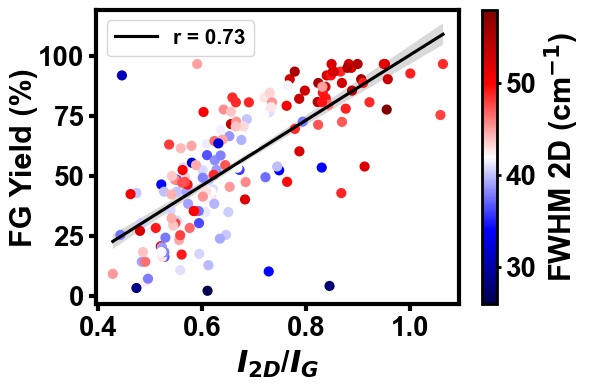

In [9]:
# remove the outliers of crystallinity
df_crystallinity_outlier_rem = df.loc[df['TwoDtoG'] > 0.2].\
                               loc[df['FWHM_2D'] > 20].loc[df['FWHM_2D'] < 80]\
                               .loc[df['DtoG']>0.2]
# Plot pred vs. true values for test set, coloring the charge density
# the same with the next plot, the next one is more accurate for coloring. Small details

fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=0, labelsize='20')

pearr = pearsonr (df_crystallinity_outlier_rem['TwoDtoG'], 
                 df_crystallinity_outlier_rem['Graphene_Yield'])

sns.regplot(data=df_crystallinity_outlier_rem, x='TwoDtoG', y='Graphene_Yield',
            scatter_kws={"color": "red"}, line_kws={"color": "black"}, scatter=False,
            ci=70, order=1, label='r = {}'.format(round (pearr[0], 2)))
plt.legend(loc='upper left', fontsize=15)

p = plt.scatter (df_crystallinity_outlier_rem['TwoDtoG'], 
             df_crystallinity_outlier_rem['Graphene_Yield'], s=40,
                   c=df_crystallinity_outlier_rem['FWHM_2D'], cmap='seismic')
    
cb = fig.colorbar(p, ax=ax)
[i.set_linewidth(2) for i in cb.ax.spines.values()]
cb.ax.tick_params(axis='both', which='major', width=2, length=3,)
cb.ax.tick_params(labelsize=20)
cb.set_label('FWHM 2D (cm$^{-1}$)', fontsize='22', fontname='Arial', fontweight='bold')

# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('$I_{2D}$/$I_G$', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold', labelpad=0)
#plt.ylim((-10, 120))
#plt.xlim((0.35, 1.2))
# ax.legend(fontsize=12)
[i.set_linewidth(3) for i in ax.spines.values()]
# Save
plt.tight_layout()
plt.savefig('./Fig1/fig1g_TwoDtoG_GY_FWHMcolor.jpeg', dpi=500)

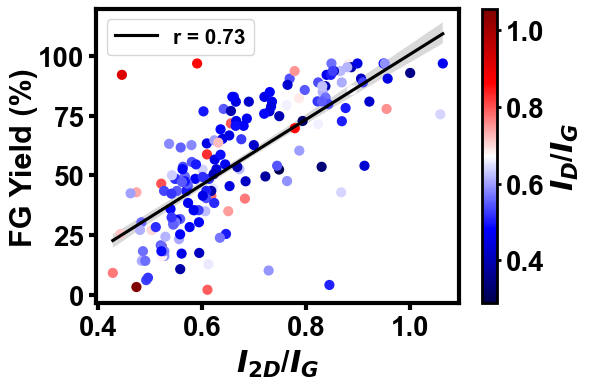

In [10]:
# Plot pred vs. true values for test set, coloring the charge density
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=0, labelsize='20')

pearr = pearsonr (df_crystallinity_outlier_rem['TwoDtoG'], 
                 df_crystallinity_outlier_rem['Graphene_Yield'])

sns.regplot(data=df_crystallinity_outlier_rem, x='TwoDtoG', y='Graphene_Yield',
            scatter_kws={"color": "red"}, line_kws={"color": "black"}, scatter=False,
            ci=70, order=1, label='r = {}'.format(round (pearr[0], 2)))
plt.legend(fontsize=15)
p = plt.scatter (df_crystallinity_outlier_rem['TwoDtoG'], 
                 df_crystallinity_outlier_rem['Graphene_Yield'],
             c=df_crystallinity_outlier_rem['DtoG'], alpha=1, s=40,
             cmap='seismic')
 
cb = fig.colorbar(p, ax=ax)
[i.set_linewidth(2) for i in cb.ax.spines.values()]
cb.ax.tick_params(axis='both', which='major', width=2, length=3)

cb.set_label('$I_{D}$/$I_G$', fontsize='22', fontname='Arial', fontweight='bold')
cb.ax.tick_params(labelsize=20)

# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('$I_{2D}$/$I_G$', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_ylabel('FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold', labelpad=0)
#plt.ylim((-10, 120))
#plt.xlim((0.35, 1.2))
# ax.legend(fontsize=12)
[i.set_linewidth(3) for i in ax.spines.values()]
# Save
plt.tight_layout()
plt.savefig('./Fig1/fig1f_TowDtoG_GY_DtoGcolor.jpeg', dpi=500)

mean for Graphene_Yield: 54.05
sd for Graphene_Yield: 27.36
mean for TwoDtoG: 0.66
sd for TwoDtoG: 0.17
mean for FWHM_2D: 43.88
sd for FWHM_2D: 11.55
mean for DtoG: 0.54
sd for DtoG: 0.14


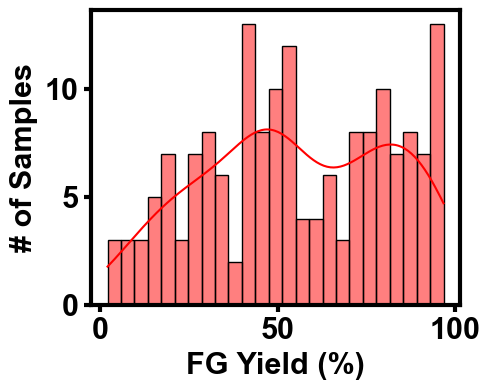

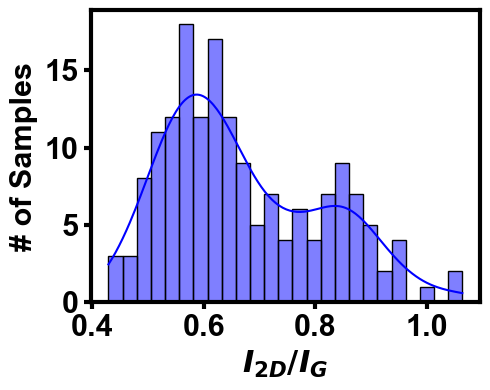

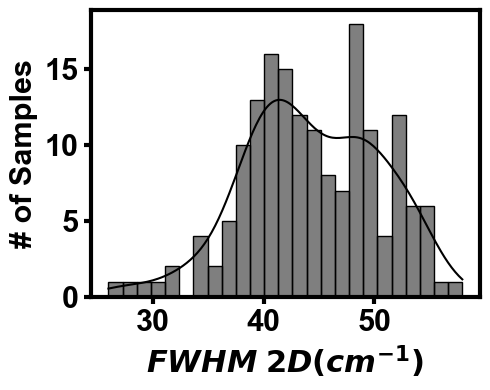

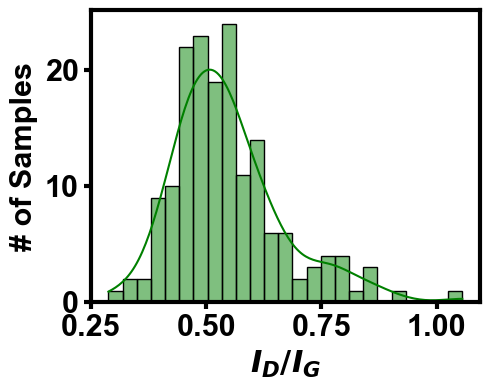

In [11]:
interests = ['Graphene_Yield', 'TwoDtoG', 'FWHM_2D', 'DtoG']
colors = ['red', 'blue', 'black', 'green']
X_labels = ['FG Yield (%)', '$I_{2D}/I_{G}$', '$FWHM$ $2D (cm^{-1})$', '$I_{D}/I_{G}$']
panels = ['b', 'c', 'd', 'e']
for counter, interest in enumerate(interests):
    fig, ax = plt.subplots(figsize=(5, 4))
    sns.histplot(data=df_crystallinity_outlier_rem[interest], bins=25, color=colors[counter],
                 kde=True,cbar=True)

    plt.xlabel(X_labels[counter], fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
    plt.ylabel('# of Samples', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
    ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='22')
    [i.set_linewidth(3) for i in ax.spines.values()]
    print ('mean for {}: {}'.format (interest, 
                                     round (np.mean (df[interest]), 2)))
    print ('sd for {}: {}'.format (interest, 
                                   round (np.std (df[interest]), 2)))
    plt.tight_layout()
    plt.savefig('./Fig1/fig1{}_{}_hist.jpeg'.format(panels[counter], interest), dpi=500)

PearsonRResult(statistic=0.43710023577336443, pvalue=1.8246238590957395e-09)


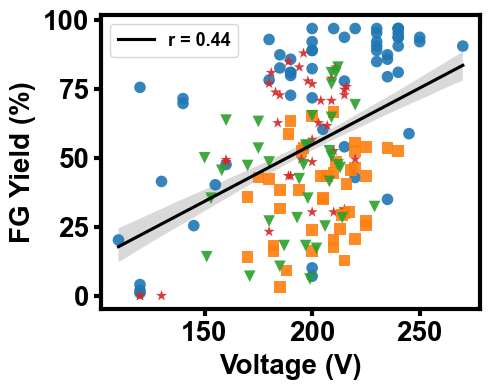

In [12]:
# relation of I_max and GY depend on material group. 
interest = "Voltage"
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
colors=['blue', 'red', 'green', 'orange']

sns1= sns.regplot(data=df, x=interest, y='Graphene_Yield', 
            scatter_kws={"color": "black"}, line_kws={"color": "black"},
            ci=70, order=1, scatter=False,)# hue='Material')

sns.scatterplot(data=df, x='Voltage', y='Graphene_Yield', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor='None',
                style='Material', alpha=0.9, s=70)

plt.xlabel(r'Voltage (V)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]

pearr = pearsonr(df[interest], df['Graphene_Yield'])
print (pearr)
plt.legend([],[], frameon=False)
"""
plt.title("Pearson's r={}, p-value={}".format(round(pearr[0], 2), round(pearr[1], 3)), 
          loc='left', fontname='Arial', fontsize=17, pad=10,
          fontweight='bold', color='darkred')
"""
plt.legend(['r = {}'.format(round(pearr[0], 2))], fontsize=13, frameon=True,)
plt.tight_layout()
plt.savefig('./Fig_SI_all/figS7a_{}_GY.jpeg'.format(interest), dpi=500)

PearsonRResult(statistic=-0.4144595406674684, pvalue=1.4373572893745447e-08)


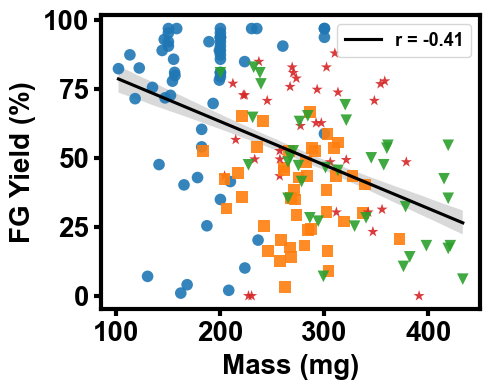

In [13]:
# relation of I_max and GY depend on material group. 
interest = "Mass"
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
colors=['blue', 'red', 'green', 'orange']

pearr = pearsonr(df[interest], df['Graphene_Yield'])
print (pearr)

sns1= sns.regplot(data=df, x=interest, y='Graphene_Yield', 
            scatter_kws={"color": "black"}, line_kws={"color": "black"},
            ci=70, order=1, scatter=False, label='r = {}'.format(round(pearr[0], 2)))# hue='Material')

sns.scatterplot(data=df, x=interest, y='Graphene_Yield', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor='None',
                style='Material', alpha=0.9, s=70)

plt.xlabel(r'Mass (mg)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend([],[], frameon=False)

plt.legend(['r = {}'.format(round(pearr[0], 2))], frameon=True, fontsize=13)
plt.tight_layout()
plt.savefig('./Fig_SI_all/figS7c_{}_GY.jpeg'.format(interest), dpi=500)

PearsonRResult(statistic=0.18873194349293837, pvalue=0.012890691867379199)


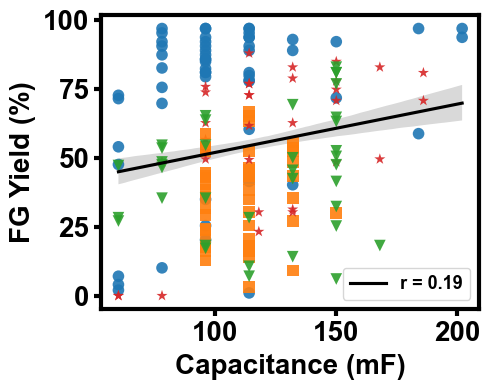

In [14]:
# relation of I_max and GY depend on material group. 
interest = "Cap"
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
colors=['blue', 'red', 'green', 'orange']

pearr = pearsonr(df[interest], df['Graphene_Yield'])
print (pearr)

sns1= sns.regplot(data=df, x=interest, y='Graphene_Yield', 
            scatter_kws={"color": "black"}, line_kws={"color": "black"},
            ci=70, order=1, scatter=False,)# hue='Material')
#plt.legend(framealpha=1)

sns.scatterplot(data=df, x=interest, y='Graphene_Yield', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor='None',
                style='Material', alpha=0.9, s=70)

plt.xlabel(r'Capacitance (mF)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend(['r = {}'.format(round(pearr[0], 2))], frameon=True, fontsize=13)

plt.tight_layout()
plt.savefig('./Fig_SI_all/figS7b_{}_GY.jpeg'.format(interest), dpi=500)

PearsonRResult(statistic=0.616328991462696, pvalue=1.7732718188288776e-19)


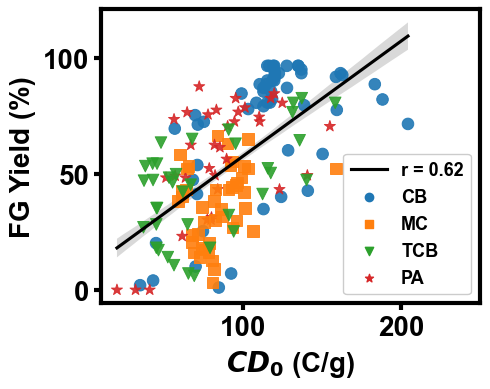

In [15]:
# relation of I_max and GY depend on material group. 
interest = "charge_density"
fig, ax = plt.subplots(figsize=(5, 4))
markers = ['o', 's', '*', 'v']
colors=['blue', 'red', 'green', 'orange']

pearr = pearsonr(df[interest], df['Graphene_Yield'])
print (pearr)

sns1= sns.regplot(data=df, x=interest, y='Graphene_Yield', 
            scatter_kws={"color": "black"}, line_kws={"color": "black"},
            ci=70, order=1, scatter=False, label='r = {}'.format(round(pearr[0], 2)))# hue='Material')
plt.legend()
sns.scatterplot(data=df, x=interest, y='Graphene_Yield', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor=None,
                style='Material', alpha=0.9, s=70)
plt.legend(framealpha=0)
plt.xlabel(r'$CD_0$ (C/g)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]
plt.legend(framealpha=1, ncol=1, fontsize=13)
"""
plt.title("Pearson's r={}, p-value={}".format(round(pearr[0], 2), round(pearr[1], 3)), 
          loc='left', fontname='Arial', fontsize=17, pad=10,
          fontweight='bold', color='darkred') 
"""
plt.xlim(10, 250)
plt.tight_layout()
plt.savefig('./Fig_SI_all/figS7d_{}_GY.jpeg'.format(interest), dpi=500)

<Axes.ArtistList of 0 artists>
<Axes.ArtistList of 0 artists>
<Axes.ArtistList of 0 artists>
PearsonRResult(statistic=0.550739553986773, pvalue=1.3604074424765306e-11)


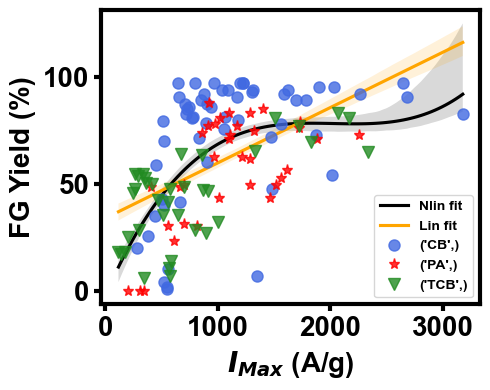

In [16]:
# relation of I_max and GY depend on material group. 
df_notMC = df.loc[df['Material'] !='MC']
fig, ax = plt.subplots(figsize=(5, 4))
sns1= sns.regplot(data=df_notMC, x='Norm_I_Max', y='Graphene_Yield', 
            scatter_kws={"color": "black"}, line_kws={"color": "black"},
            ci=70, order=3, scatter=False, label='Nlin fit')#hue='Material')
sns1.legend()
sns2= sns.regplot(data=df_notMC, x='Norm_I_Max', y='Graphene_Yield', 
            scatter_kws={"color": "red"}, line_kws={"color": "orange"},
            ci=70, order=1, scatter=False, label='Lin fit')#hue='Material')
sns2.legend()
#plt.legend(handles=[sns1, sns2])
#plt.legend(['Lin fit'])
#plt.legend(('Nlin fit', '', 'Lin fit'), loc='upper left')

groups = df_notMC.groupby(['Material'])

markers = ['o', '*', 'v']
colors=['royalblue', 'red', 'forestgreen']

counter = 0
for name, group in groups:
    ax.plot(group.Norm_I_Max, group.Graphene_Yield, marker=markers[counter], alpha=0.8, color=colors[counter],
            linestyle='', ms=8, label=name)
    print (ax.artists)
    counter+=1
plt.legend(loc='lower right')

plt.xlabel(r'$I_{Max}$ (A/g)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
plt.savefig('./Fig_SI_all/figS3a_Imax_GY_notMC.jpeg', dpi=500)
print (pearsonr(df_notMC['Norm_I_Max'], df_notMC['Graphene_Yield']))

In [17]:
print (pearsonr(df_notMC['Norm_I_Max'].loc[df['Material']=='CB'], 
                df_notMC['Graphene_Yield'].loc[df['Material']=='CB']))
print (pearsonr(df_notMC['Norm_I_Max'].loc[df['Material']=='TCB'], 
                df_notMC['Graphene_Yield'].loc[df['Material']=='TCB']))
print (pearsonr(df_notMC['Norm_I_Max'].loc[df['Material']=='PA'], 
                df_notMC['Graphene_Yield'].loc[df['Material']=='PA']))

PearsonRResult(statistic=0.4111630285293328, pvalue=0.001486881977460316)
PearsonRResult(statistic=0.6649516426132578, pvalue=7.147460801992109e-06)
PearsonRResult(statistic=0.6204594697210968, pvalue=7.005299233155074e-05)


PearsonRResult(statistic=0.26111097301689673, pvalue=0.08689789694650704)


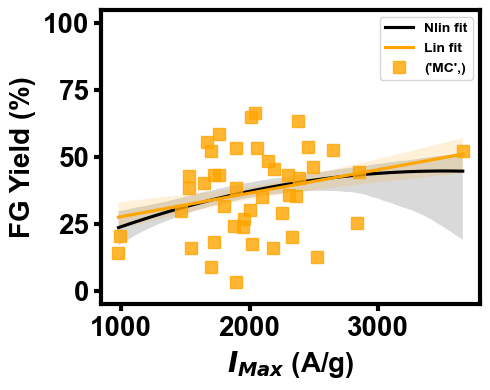

In [18]:
# relation of I_max and GY depend on material group. 
df_MC = df.loc[df['Material'] =='MC']
fig, ax = plt.subplots(figsize=(5, 4))
sns1 = sns.regplot(data=df_MC, x='Norm_I_Max', y='Graphene_Yield', 
            scatter_kws={"color": "black"}, line_kws={"color": "black"},
            ci=70, order=2, scatter=False, label='Nlin fit')#hue='Material')
sns1.legend()
sns2 = sns.regplot(data=df_MC, x='Norm_I_Max', y='Graphene_Yield', 
            scatter_kws={"color": "black"}, line_kws={"color": "orange"},
            ci=70, order=1, scatter=False, label='Lin fit')#hue='Material')
sns2.legend()
groups = df_MC.groupby(['Material'])

markers = ['s', ]
colors=['orange',]

counter = 0
for name, group in groups:
    ax.plot(group.Norm_I_Max, group.Graphene_Yield, marker=markers[counter], alpha=0.8, color='orange',
            linestyle='', ms=8, label=name)
    counter+=1
plt.legend(loc='upper right')
plt.ylim(-5, 105)

plt.xlabel(r'$I_{Max}$ (A/g)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
plt.savefig('./Fig_SI_all/figS3b_Imax_GY_MC.jpeg', dpi=500)
print (pearsonr(df_MC['Norm_I_Max'], df_MC['Graphene_Yield']))
#sns.lmplot(data=df_MC, x='Norm_I_Max', y='Graphene_Yield', ci=0, order=1, hue="Material")
#plt.scatter (data=df_MC, x='Norm_I_Max', y='Graphene_Yield', hue='Material')#hue='Material')

GY is different for different material:  21.418942989646055 8.294709255926139e-12
Only the difference B/W MC and TCB is not significant:  26.345984960628492 1.582646385209848e-06


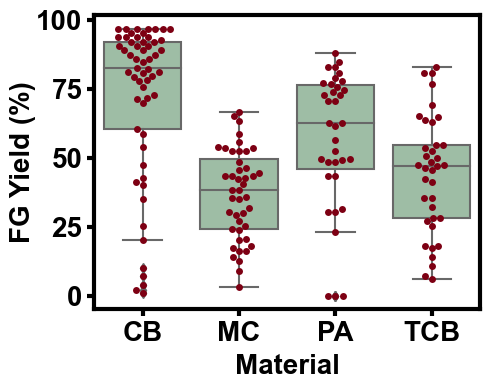

In [19]:
# distribution of Voltage for different materials
interest = 'Graphene_Yield'
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.boxplot(x='Material', y=interest, data=df, color='#99c2a2')
ax = sns.swarmplot(x="Material", y=interest, data=df, color='#7d0013')

plt.xlabel('Material', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=0)

ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
plt.savefig('./Fig1/fig1h_GY_diffMaterial.jpeg', dpi=500)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    df[interest].loc[df['Material']=='MC'], 
    df[interest].loc[df['Material']=='TCB'], 
    df[interest].loc[df['Material']=='PA']
)
print("GY is different for different material: ", fvalue, pvalue)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    #df[interest].loc[df['Material']=='MC'], 
    #df[interest].loc[df['Material']=='PA'],
    df[interest].loc[df['Material']=='TCB'], 
    
)
print ('Only the difference B/W MC and TCB is not significant: ', fvalue, pvalue)

GY is different for different material:  99.29811508214692 4.257086195625861e-37
Only the difference B/W MC and TCB is not significant:  0.529377077688059 0.4687164736518864


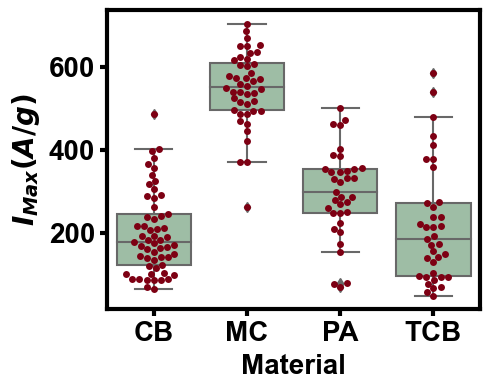

In [20]:
# distribution of Voltage for different materials
interest = 'I_Max'
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.boxplot(x='Material', y=interest, data=df, color='#99c2a2')
ax = sns.swarmplot(x="Material", y=interest, data=df, color='#7d0013')

plt.xlabel('Material', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('$I_{Max} (A/g)$', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
plt.savefig('./Fig_SI_all/figS2a_{}_diffMaterial.jpeg'.format(interest), dpi=500)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    df[interest].loc[df['Material']=='MC'], 
    df[interest].loc[df['Material']=='TCB'], 
    df[interest].loc[df['Material']=='PA']
)
print("GY is different for different material: ", fvalue, pvalue)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    #df[interest].loc[df['Material']=='MC'], 
    #df[interest].loc[df['Material']=='PA'],
    df[interest].loc[df['Material']=='TCB'], 
    
)
print ('Only the difference B/W MC and TCB is not significant: ', fvalue, pvalue)

/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


GY is different for different material:  2.9012095475966855 0.03653688125570461
Only the difference B/W MC and TCB is not significant:  1.404321313532881 0.239053494377123


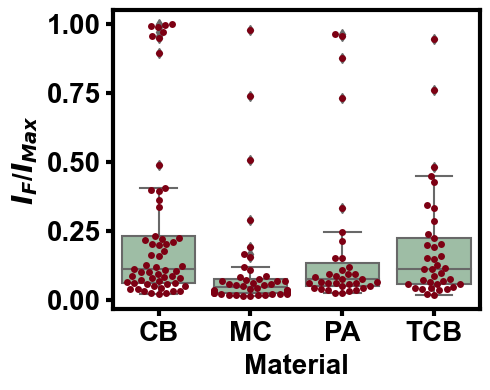

In [21]:
# distribution of Voltage for different materials
interest = 'Final_Current_Percent'
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.boxplot(x='Material', y=interest, data=df, color='#99c2a2')
ax = sns.swarmplot(x="Material", y=interest, data=df, color='#7d0013')

plt.xlabel('Material', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('$I_{F}$/$I_{Max}$', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
plt.savefig('./Fig_SI_all/figS2b_{}_diffMaterial.jpeg'.format(interest), dpi=500)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    df[interest].loc[df['Material']=='MC'], 
    df[interest].loc[df['Material']=='TCB'], 
    df[interest].loc[df['Material']=='PA']
)
print("GY is different for different material: ", fvalue, pvalue)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    #df[interest].loc[df['Material']=='MC'], 
    #df[interest].loc[df['Material']=='PA'],
    df[interest].loc[df['Material']=='TCB'], 
    
)
print ('Only the difference B/W MC and TCB is not significant: ', fvalue, pvalue)

GY is different for different material:  16.058876069968367 3.127427912541107e-09
Only the difference B/W MC and TCB is not significant:  1.6200247741511082 0.20629545862492474


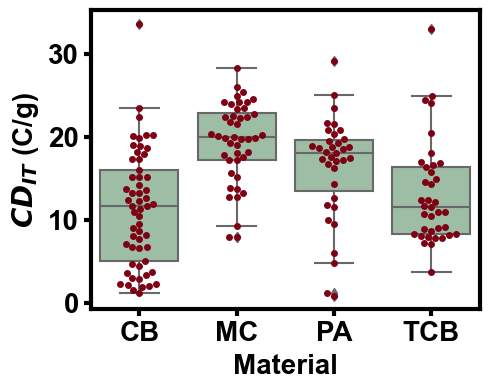

In [22]:
# distribution of Voltage for different materials
interest = 'Charge_Tot'
fig, ax = plt.subplots(figsize=(5, 4))
ax = sns.boxplot(x='Material', y=interest, data=df, color='#99c2a2')
ax = sns.swarmplot(x="Material", y=interest, data=df, color='#7d0013')

plt.xlabel('Material', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('$CD_{IT}$ (C/g)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)

ax.tick_params(axis='both', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
[i.set_linewidth(3) for i in ax.spines.values()]

plt.tight_layout()
plt.savefig('./Fig_SI_all/figS2c_{}_diffMaterial.jpeg'.format(interest), dpi=500)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    df[interest].loc[df['Material']=='MC'], 
    df[interest].loc[df['Material']=='TCB'], 
    df[interest].loc[df['Material']=='PA']
)
print("GY is different for different material: ", fvalue, pvalue)

fvalue, pvalue = stats.f_oneway(
    df[interest].loc[df['Material']=='CB'], 
    #df[interest].loc[df['Material']=='MC'], 
    #df[interest].loc[df['Material']=='PA'],
    df[interest].loc[df['Material']=='TCB'], 
    
)
print ('Only the difference B/W MC and TCB is not significant: ', fvalue, pvalue)

In [23]:
df.groupby('Material').mean(['Mass']).index.array

<PandasArray>
['CB', 'MC', 'PA', 'TCB']
Length: 4, dtype: object

In [24]:
df

,Sample,Material,Atmosphere,Mass,Tube Diam,Pretreat_voltage,Pretreat_highest,Voltage,PulseTime,Res_Volt,...,TwoDtoG,DtoG,FWHM_2D,temp2,Norm_charge_tot,Norm_I_Max,charge_density,Final_Current_Percent,tsne1,tsne2
0,1,CB,vac,200.0,8,60,60,235,1200,56.0,...,0.798070,0.546842,52.940275,2761.825034,80.159727,746.820500,112.800000,0.063619,-41.129337,4.892799
1,2,CB,vac,161.9,8,150,50,120,50,98.0,...,0.458187,0.912020,0.000000,348.262804,13.029621,547.293823,84.496603,0.990995,27.628786,30.623848
2,3,CB,vac,200.0,8,240,60,235,300,161.0,...,0.650986,0.746614,40.452173,910.538274,35.543043,443.034350,112.800000,0.158840,8.538393,25.595697
3,4,CB,vac,200.0,8,320,80,235,900,43.0,...,0.763019,0.661025,50.596165,2144.924660,86.790377,513.726500,112.800000,0.099584,-39.814785,11.147732
4,5,CB,air,187.0,8,60,60,145,125,104.6,...,0.646567,0.500579,40.277124,406.504813,19.643746,375.748930,74.438503,0.216167,15.443512,28.324041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,170,TCB,vac,360.0,8,150,60,175,220,112.0,...,0.668323,0.394274,41.922440,321.367151,30.425001,289.649444,37.916667,0.197223,-3.665282,22.597441
169,171,TCB,vac,321.0,8,210,70,160,430,56.0,...,0.631814,0.721581,32.193091,381.665418,56.169822,676.011215,47.850467,0.096532,-10.766213,14.660872
170,172,TCB,vac,345.0,8,200,100,150,530,32.0,...,0.542554,0.633724,43.684705,447.865429,59.515878,413.002609,57.391304,0.068991,-1.341197,21.228144
171,173,TCB,air,275.0,8,200,100,170,390,33.0,...,0.562038,0.547242,47.415184,343.813959,87.632616,864.124000,37.090909,0.067037,1.709092,13.674364


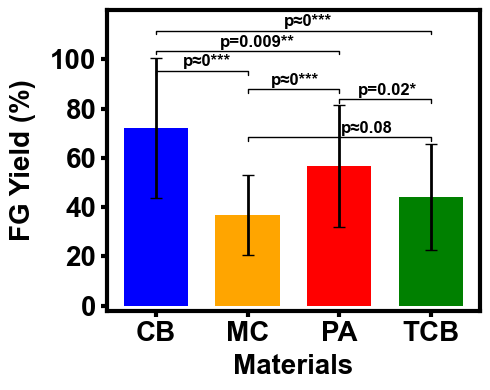

In [25]:
# compare FG Yield of different precursor materials
df = df.drop(columns='Atmosphere')
ind  = np.arange(4)    # the x locations for the groups
width= 0.7
labels = df.groupby('Material').mean().index.array

# Pull the formatting out here
bar_kwargs = {'width':width,'linewidth':2,'zorder':5}
err_kwargs = {'zorder':5,'fmt':'none','linewidth':2,'ecolor':'k'}  #for matplotlib >= v1.4 use 'fmt':'none' instead


Ra_means = df.groupby('Material').mean()['Graphene_Yield'].values
Ra_std = df.groupby('Material').std()['Graphene_Yield'].values

fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(axis='x', length=4, width=3, colors='black', grid_alpha=0, labelsize='20')
ax.tick_params(axis='y', length=4, width=3, colors='black', grid_alpha=0, labelsize='20')

ax.p1 = plt.bar(ind, Ra_means, color=['blue', 'orange' , 'red', 'green'], **bar_kwargs)
ax.errs = plt.errorbar(ind, Ra_means, yerr=Ra_std, capsize=4, **err_kwargs)


# Custom function to draw the diff bars

def label_diff(i, j, text, X, Y, count):
    x = (X[i] + X[j])/2
    y = max(Y[i], Y[j])
    dx = abs(X[i] - X[j])

    props0 = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':17,'shrinkB':17,'linewidth':1}
    props1 = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':37,'shrinkB':37,'linewidth':1}
    props2 = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':57,'shrinkB':57,'linewidth':1}
    props3 = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':17,'shrinkB':17,'linewidth':1}
    props4 = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':37,'shrinkB':37,'linewidth':1}
    props5 = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':17,'shrinkB':17,'linewidth':1}
    
    if count==0:
        ax.annotate(text, xy=(x-0.2,y+25), zorder=10, fontsize=12, fontweight='bold')
        ax.annotate('', xy=(X[i], y+12), xytext=(X[j], y+12), arrowprops=props0)
    elif count==1:
        ax.annotate(text, xy=(x-0.3,y+33), zorder=10, fontsize=12, fontweight='bold')
        ax.annotate('', xy=(X[i], y+9), xytext=(X[j], y+9), arrowprops=props1)
    elif count==2:
        ax.annotate(text, xy=(x-0.1,y+41.5), zorder=1, fontsize=12, fontweight='bold')
        ax.annotate('', xy=(X[i], y+6), xytext=(X[j], y+6), arrowprops=props2)
    elif count==3:
        ax.annotate(text, xy=(x-0.25,y+33), zorder=10, fontsize=12, fontweight='bold')
        ax.annotate('', xy=(X[i], y+20), xytext=(X[j], y+20), arrowprops=props3)
    elif count==4:
        ax.annotate(text, xy=(x+0.02,y+26), zorder=10, fontsize=12, fontweight='bold')
        ax.annotate('', xy=(X[i], y+2), xytext=(X[j], y+2), arrowprops=props4)        
    else:
        ax.annotate(text, xy=(x-0.3,y+29), zorder=10, fontsize=12, fontweight='bold')
        ax.annotate('', xy=(X[i], y+16), xytext=(X[j], y+16), arrowprops=props5)   

# Call the function

label_diff(0, 1,'p≈0***', ind, Ra_means, 0)
label_diff(0, 2,'p=0.009**', ind, Ra_means, 1)
label_diff(0, 3,'p≈0***', ind, Ra_means, 2)
label_diff(1, 2,'p≈0***', ind, Ra_means, 3)
label_diff(1, 3,'p≈0.08', ind, Ra_means, 4)
label_diff(2, 3,'p=0.02*', ind, Ra_means, 5)

#label_diff(1, 3,'p < 0.001***',ind, Ra_means)
#label_diff(2,3,'p=0.0025',ind,Ra_means)

plt.xlabel('Materials', fontsize='20', fontname='Arial', fontweight='bold', labelpad=5)
plt.ylabel('FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=10)

[i.set_linewidth(3) for i in ax.spines.values()]

plt.ylim(ymax=120)
plt.ylim(ymin=-2)
plt.yticks((0, 20, 40, 60, 80, 100))
plt.xticks(ind, labels, color='k')
plt.tight_layout()

plt.savefig ('./Fig1/fig1i_GY_diffMaterial_pval.jpeg', dpi=500)

/tmp/ipykernel_20829/116801939.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (GY_CB, color='blue', hist=False, bins=bins, )#norm_hist=True)
/tmp/ipykernel_20829/116801939.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot (GY_MC, color='orange', hist=False, bins=bins)


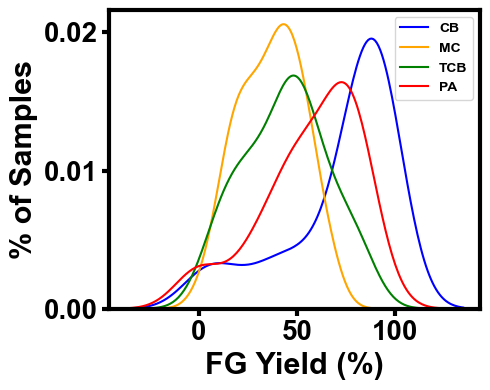

In [26]:
# FG Yield sictribution of different materials
GY_CB = np.array (df['Graphene_Yield'].loc[df['Material'] =='CB']).reshape(-1, 1)
GY_MC = np.array (df['Graphene_Yield'].loc[df['Material'] =='MC']).reshape(-1, 1)
GY_PA = np.array (df['Graphene_Yield'].loc[df['Material'] =='PA']).reshape(-1, 1)
GY_TCB = np.array (df['Graphene_Yield'].loc[df['Material'] =='TCB']).reshape(-1, 1)

fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(axis='x', direction='out', length=5, width=3, colors='black', 
               grid_alpha=0, labelsize='20')
ax.tick_params(axis='y', direction='out', length=5, width=3, colors='black', 
               grid_alpha=0, labelsize='20')
plt.xlabel('FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold')
plt.ylabel('% of Samples', fontsize='22', fontname='Arial', fontweight='bold')

bins = np.linspace(np.min(GY_CB), np.max(GY_CB), 20)
sns.distplot (GY_CB, color='blue', hist=False, bins=bins, )#norm_hist=True)

bins = np.linspace(np.min(GY_MC), np.max(GY_MC), 20)
sns.distplot (GY_MC, color='orange', hist=False, bins=bins)

bins = np.linspace(np.min(GY_TCB), np.max(GY_TCB), 20)
sns.distplot (GY_TCB, color='green', hist=False, bins=bins) 

bins = np.linspace(np.min(GY_PA), np.max(GY_PA), 20)
sns.distplot (GY_PA, color='red', hist=False, bins=bins)


[i.set_linewidth(3) for i in ax.spines.values()]

plt.yticks((0.0, 0.01, 0.02))
plt.legend(['CB', 'MC', 'TCB', 'PA'])
plt.tight_layout()
plt.savefig('./Fig_SI_all/figS1_hist_GY_materials.jpeg', dpi=500)

In [27]:
# Random Forest Regression result
r_squareds_global_rfr = []
RMSEs_global_rfr = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()
counter = 0

# test for 5 different splits of dataset
for glob_split in pbar(range(global_split_rand, global_split_rand + 5)):
    #### Materials coef. for 3 time-current properties
    #print ('#### material coef. for 3 current properties')
    
    ## material coef. Final_Current_Percent
    input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                     Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Final_Current_Percent, test_size=0.2, random_state=glob_split)
    
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_IfImax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_IfImax: ', pearr[0])
    
    ## material coef. I_max normalized
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_I_Max, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_Imax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_Imax: ', pearr[0])
    
    ## material coef.  Norm_charge_tot
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_charge_tot, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_chargetot: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_chargetot: ', pearr[0])
    material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
    material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
    material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot
    
    #### proxy RF Final_Current_percent
    new_features = np.concatenate ((charge_denisty, pulsetime,
                                    material_type_I_Finalperc_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                          train_test_split(new_features, Final_Current_Percent, df['Material'],
                                         indices, test_size = 0.20, random_state = glob_split)
    rfr_final_I_percent = XGBRegressor(max_depth=3, n_estimators=20, gamma=0.001, 
                       learning_rate=0.0994, subsample=0.77, min_child_weight=9, n_jobs=1,
                       random_state=3970)
    
    rfr_final_I_percent.fit(train_new_features, train_labels)
    Final_Current_Percent_predicted = rfr_final_I_percent.predict(new_features)  
    y_pred = rfr_final_I_percent.predict(test_new_features)
    r_squared_Final_Current_test = r2_score(test_labels, y_pred)
    #print('r2 score = ', r_squared_Final_Current_test)
    pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
    #print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

    #### proxy RF Norm_I_Max
    new_features = np.concatenate ((charge_denisty,
                                    pulsetime, material_type_Norm_I_Max_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_I_Max, 
                                           indices, test_size = 0.2, random_state = glob_split)  
    rfr_norm_I_max = XGBRegressor(max_depth=5, n_estimators=35, gamma=0.001, 
                       learning_rate=0.09, subsample=0.775, min_child_weight=12, n_jobs=1,
                      random_state=5965)
    
    rfr_norm_I_max.fit(train_new_features, train_labels);
    Norm_I_Max_predicted = rfr_norm_I_max.predict(new_features)
    Norm_I_Max_test = rfr_norm_I_max.predict(test_new_features)
    r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
    #print('r2 score for test = ', r_squared_Norm_I_Max_test)
    pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
    #print('pearson r for test= ', pr_Norm_I_Max_test[0])
    
    #### proxy RF Norm_Norm_charge_tot
    #print ('#### proxy RF Norm_Norm_charge_tot')
    new_features = np.concatenate ((charge_denisty,pulsetime,
                                    material_type_Norm_charge_Tot_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_charge_tot, 
                                           indices, test_size = 0.20, random_state = glob_split)
    rfr_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.0994, subsample=0.75, min_child_weight=3, n_jobs=1,
                  random_state=4719)

    rfr_norm_charge_total.fit(train_new_features, train_labels)
    Norm_charge_tot_predicted = rfr_norm_charge_total.predict(new_features)
    Norm_charge_tot_test = rfr_norm_charge_total.predict(test_new_features)
    r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
    #print('r2 score for test= ', r_squared_Norm_charge_tot_test)
    pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
    #print('pearson r for test= ', pr_Norm_charge_tot_test[0])
    
    #### FINAL prediction of Graphene Yield
    CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
    resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
    heat_power = np.array (df['Voltage']*df['Voltage']/(resistance_matrix**1)*df['PulseTime']*(1e-6)).reshape(-1, 1)
    CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                                 CB_MC_PA_coef_Norm_I_Max +
                                 CB_MC_PA_coef_Norm_charge_tot)/3

    material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average
    new_features = np.concatenate ((charge_denisty, 
                                    X_CB_MC_PA_TCB_ps_res_sa_sp2,
                                    #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                    #material_type_GY_coef,
                                    pulsetime,
                                    Pretreat_voltage,
                                    (np.array (df['temp2']).reshape(-1, 1))/1000,
                                    atmosphere_type,
                                    Final_Current_Percent_predicted.reshape(-1, 1),
                                    Norm_I_Max_predicted.reshape(-1, 1),
                                    Norm_charge_tot_predicted.reshape(-1, 1), 
                                    heat_power.reshape(-1, 1)), axis=1)
    test_size = 0.2
    indices = np.arange(len(new_features))
    labels = Graphene_Yield
    train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                          train_test_split(new_features, labels, 
                                           indices, test_size = test_size, random_state=glob_split)
    r_squareds = list()
    RMSEs_rfr = list()
    r_squareds_randomized_testtrain = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    r2_max = 0
    test_split_seed1 = glob_split
    test_split_seed2 = glob_split + 1
    test_split_count = test_split_seed2 - test_split_seed1
    rep=10
    r_squareds = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    
    # Instantiate model with 1000 decision trees
    rfr_graphyield = RandomForestRegressor(max_depth=4, 
                                           n_estimators=50, 
                                           random_state=95807, 
                                           min_samples_split=5)
    # Train the model on training data
    rfr_graphyield.fit(train_new_features, train_labels);
    predictions = rfr_graphyield.predict(test_new_features)
    r_squared = r2_score(test_labels, predictions)
    r_squareds.append (r_squared)
    RMSEs_rfr.append (np.sqrt (mean_squared_error(predictions, test_labels)))
    #m = tf.keras.metrics.RootMeanSquaredError()
    pred_test = predictions
    #m.update_state(pred_test, test_labels)
    #print ('RMSE for test, ', m.result().numpy())
    r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
    #print ('all r2: ', r_squareds_randomized_testtrain_vec)
    r_squareds_global_rfr.append(r_squareds)
    RMSEs_global_rfr.append (RMSEs_rfr)
    list_glob_rand_state.append(glob_split)
    counter += 1

print ('R2: ', np.mean(r_squareds_global_rfr))
print ('RMSE: ', np.mean(RMSEs_global_rfr))
end = time.time()
print ('time is : ', end-start)

/tmp/ipykernel_20829/3633291074.py:171: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_graphyield.fit(train_new_features, train_labels);
/tmp/ipykernel_20829/3633291074.py:171: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_graphyield.fit(train_new_features, train_labels);
/tmp/ipykernel_20829/3633291074.py:171: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_graphyield.fit(train_new_features, train_labels);
/tmp/ipykernel_20829/3633291074.py:171: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_graphyield.fit(train_new_features, train_label

R2:  0.7519579321979849
RMSE:  13.817330076392278
time is :  0.2773101329803467


In [28]:
# Linear Regression result
r_squareds_global_lr = []
RMSEs_global_lr = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()

counter = 0

# test for 5 different splits of dataset
for glob_split in pbar(range(global_split_rand, global_split_rand+5)):
    #### Materials coef. for 3 time-current properties
    #print ('#### material coef. for 3 current properties')
    ## material coef. Final_Current_Percent
    input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                     Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Final_Current_Percent, test_size=0.2, random_state=glob_split)
    
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_IfImax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_IfImax: ', pearr[0])
    
    ## material coef. I_max normalized
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_I_Max, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_Imax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_Imax: ', pearr[0])
    
    ## material coef.  Norm_charge_tot
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_charge_tot, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_chargetot: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_chargetot: ', pearr[0])
    material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
    material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
    material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot
    
    #### proxy RF Final_Current_percent
    new_features = np.concatenate ((charge_denisty, pulsetime,
                                    material_type_I_Finalperc_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                          train_test_split(new_features, Final_Current_Percent, df['Material'],
                                         indices, test_size = 0.20, random_state = glob_split)
    lr_final_I_percent = XGBRegressor(max_depth=3, n_estimators=20, gamma=0.001, 
                       learning_rate=0.0994, subsample=0.77, min_child_weight=9, n_jobs=1,
                       random_state=3970)
    
    lr_final_I_percent.fit(train_new_features, train_labels)
    Final_Current_Percent_predicted = lr_final_I_percent.predict(new_features)  
    y_pred = lr_final_I_percent.predict(test_new_features)
    r_squared_Final_Current_test = r2_score(test_labels, y_pred)
    #print('r2 score = ', r_squared_Final_Current_test)
    pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
    #print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

    #### proxy RF Norm_I_Max
    new_features = np.concatenate ((charge_denisty,
                                    pulsetime, material_type_Norm_I_Max_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_I_Max, 
                                           indices, test_size = 0.2, random_state = glob_split)  
    lr_norm_I_max = XGBRegressor(max_depth=5, n_estimators=35, gamma=0.001, 
                       learning_rate=0.09, subsample=0.775, min_child_weight=12, n_jobs=1,
                      random_state=5965)
    
    lr_norm_I_max.fit(train_new_features, train_labels);
    Norm_I_Max_predicted = lr_norm_I_max.predict(new_features)
    Norm_I_Max_test = lr_norm_I_max.predict(test_new_features)
    r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
    #print('r2 score for test = ', r_squared_Norm_I_Max_test)
    pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
    #print('pearson r for test= ', pr_Norm_I_Max_test[0])
    
    #### proxy RF Norm_Norm_charge_tot
    #print ('#### proxy RF Norm_Norm_charge_tot')
    new_features = np.concatenate ((charge_denisty,pulsetime,
                                    material_type_Norm_charge_Tot_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_charge_tot, 
                                           indices, test_size = 0.20, random_state = glob_split)
    lr_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.0994, subsample=0.75, min_child_weight=3, n_jobs=1,
                  random_state=4719)
 
    lr_norm_charge_total.fit(train_new_features, train_labels)
    Norm_charge_tot_predicted = lr_norm_charge_total.predict(new_features)
    Norm_charge_tot_test = lr_norm_charge_total.predict(test_new_features)
    r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
    #print('r2 score for test= ', r_squared_Norm_charge_tot_test)
    pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
    #print('pearson r for test= ', pr_Norm_charge_tot_test[0])
    
    #### FINAL prediction of Graphene Yield
    CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
    resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
    heat_power = np.array (df['Voltage']*df['Voltage']/(resistance_matrix**1)*df['PulseTime']*(1e-6)).reshape(-1, 1)
    CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                                 CB_MC_PA_coef_Norm_I_Max +
                                 CB_MC_PA_coef_Norm_charge_tot)/3

    material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average
    new_features = np.concatenate ((charge_denisty, 
                                    X_CB_MC_PA_TCB_ps_res_sa_sp2,
                                    #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                    #material_type_GY_coef,
                                    pulsetime,
                                    Pretreat_voltage,
                                    (np.array (df['temp2']).reshape(-1, 1))/1000,
                                    atmosphere_type,
                                    Final_Current_Percent_predicted.reshape(-1, 1),
                                    Norm_I_Max_predicted.reshape(-1, 1),
                                    Norm_charge_tot_predicted.reshape(-1, 1), 
                                    heat_power.reshape(-1, 1)), axis=1)
    test_size = 0.2
    indices = np.arange(len(new_features))
    labels = Graphene_Yield
    train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                          train_test_split(new_features, labels, 
                                           indices, test_size = test_size, random_state=glob_split)
    r_squareds = list()
    RMSEs_lr = list()
    r_squareds_randomized_testtrain = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    r2_max = 0
    test_split_seed1 = glob_split
    test_split_seed2 = glob_split + 1
    test_split_count = test_split_seed2 - test_split_seed1
    rep=10
    r_squareds = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()

    # Instantiate model with 1000 decision trees
    lr_graphyield = linear_model.LinearRegression()
    # Train the model on training data
    lr_graphyield.fit(train_new_features, train_labels);
    predictions = lr_graphyield.predict(test_new_features)
    r_squared = r2_score(test_labels, predictions)
    r_squareds.append (r_squared)
    RMSEs_lr.append (np.sqrt (mean_squared_error(predictions, test_labels)))
    #m = tf.keras.metrics.RootMeanSquaredError()
    pred_test = predictions
    #m.update_state(pred_test, test_labels)
    #print ('RMSE for test, ', m.result().numpy())
    r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
    #print ('all r2: ', r_squareds_randomized_testtrain_vec)
    r_squareds_global_lr.append(r_squareds)
    list_glob_rand_state.append(glob_split)
    RMSEs_global_lr.append (RMSEs_lr)
    counter += 1

print ('R2: ', np.mean(r_squareds_global_lr))
print ('RMSE: ', np.mean(RMSEs_global_lr))
end = time.time()
print ('time is : ', end-start)

R2:  0.6332711333579135
RMSE:  16.770617172615452
time is :  0.11734700202941895


In [29]:
# Bayesian Ridge Regression result
r_squareds_global_br = []
list_glob_rand_state = []
RMSEs_global_br = []
start = time.time()
pbar = ProgressBar()
counter = 0

# test for 5 different splits of dataset
for glob_split in pbar(range(global_split_rand, global_split_rand+5)):
    #### Materials coef. for 3 time-current properties
    #print ('#### material coef. for 3 current properties')
    ## material coef. Final_Current_Percent
    input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                     Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Final_Current_Percent, test_size=0.2, random_state=glob_split)
    
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_IfImax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_IfImax: ', pearr[0])
    
    ## material coef. I_max normalized
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_I_Max, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_Imax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_Imax: ', pearr[0])
    
    ## material coef.  Norm_charge_tot
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_charge_tot, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_chargetot: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_chargetot: ', pearr[0])
    material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
    material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
    material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot
    
    #### proxy RF Final_Current_percent
    new_features = np.concatenate ((charge_denisty, pulsetime,
                                    material_type_I_Finalperc_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                          train_test_split(new_features, Final_Current_Percent, df['Material'],
                                         indices, test_size = 0.20, random_state = glob_split)
    br_final_I_percent = XGBRegressor(max_depth=3, n_estimators=20, gamma=0.001, 
                       learning_rate=0.0994, subsample=0.77, min_child_weight=9, n_jobs=1,
                       random_state=3970)
    
    br_final_I_percent.fit(train_new_features, train_labels)
    Final_Current_Percent_predicted = br_final_I_percent.predict(new_features)  
    y_pred = br_final_I_percent.predict(test_new_features)
    r_squared_Final_Current_test = r2_score(test_labels, y_pred)
    #print('r2 score = ', r_squared_Final_Current_test)
    pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
    #print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

    #### proxy RF Norm_I_Max
    new_features = np.concatenate ((charge_denisty,
                                    pulsetime, material_type_Norm_I_Max_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_I_Max, 
                                           indices, test_size = 0.2, random_state = glob_split)  
    br_norm_I_max = XGBRegressor(max_depth=5, n_estimators=35, gamma=0.001, 
                       learning_rate=0.09, subsample=0.775, min_child_weight=12, n_jobs=1,
                      random_state=5965)
    
    br_norm_I_max.fit(train_new_features, train_labels);
    Norm_I_Max_predicted = br_norm_I_max.predict(new_features)
    Norm_I_Max_test = br_norm_I_max.predict(test_new_features)
    r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
    #print('r2 score for test = ', r_squared_Norm_I_Max_test)
    pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
    #print('pearson r for test= ', pr_Norm_I_Max_test[0])
    
    #### proxy RF Norm_Norm_charge_tot
    #print ('#### proxy RF Norm_Norm_charge_tot')
    new_features = np.concatenate ((charge_denisty,pulsetime,
                                    material_type_Norm_charge_Tot_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_charge_tot, 
                                           indices, test_size = 0.20, random_state = glob_split)
    br_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.0994, subsample=0.75, min_child_weight=3, n_jobs=1,
                  random_state=4719)
 
    br_norm_charge_total.fit(train_new_features, train_labels)
    Norm_charge_tot_predicted = br_norm_charge_total.predict(new_features)
    Norm_charge_tot_test = br_norm_charge_total.predict(test_new_features)
    r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
    #print('r2 score for test= ', r_squared_Norm_charge_tot_test)
    pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
    #print('pearson r for test= ', pr_Norm_charge_tot_test[0])
    
    #### FINAL prediction of Graphene Yield
    CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
    resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
    heat_power = np.array (df['Voltage']*df['Voltage']/(resistance_matrix**1)*df['PulseTime']*(1e-6)).reshape(-1, 1)
    CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                                 CB_MC_PA_coef_Norm_I_Max +
                                 CB_MC_PA_coef_Norm_charge_tot)/3

    material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average
    new_features = np.concatenate ((charge_denisty, 
                                    X_CB_MC_PA_TCB_ps_res_sa_sp2,
                                    #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                    #material_type_GY_coef,
                                    pulsetime,
                                    Pretreat_voltage,
                                    (np.array (df['temp2']).reshape(-1, 1))/1000,
                                    atmosphere_type,
                                    Final_Current_Percent_predicted.reshape(-1, 1),
                                    Norm_I_Max_predicted.reshape(-1, 1),
                                    Norm_charge_tot_predicted.reshape(-1, 1), 
                                    heat_power.reshape(-1, 1)), axis=1)
    test_size = 0.2
    indices = np.arange(len(new_features))
    labels = Graphene_Yield
    train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                          train_test_split(new_features, labels, 
                                           indices, test_size = test_size, random_state=glob_split)
    r_squareds = list()
    r_squareds_randomized_testtrain = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    r2_max = 0
    test_split_seed1 = glob_split
    test_split_seed2 = glob_split + 1
    test_split_count = test_split_seed2 - test_split_seed1
    rep=10
    r_squareds = list()
    RMSEs_br = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()

    br_graphyield = linear_model.BayesianRidge(n_iter=1000, tol=1e-5)
    # Train the model on training data
    br_graphyield.fit(train_new_features, train_labels);
    predictions = br_graphyield.predict(test_new_features)
    r_squared = r2_score(test_labels, predictions)
    r_squareds.append (r_squared)
    RMSEs_br.append (np.sqrt (mean_squared_error(predictions, test_labels)))
    #m = tf.keras.metrics.RootMeanSquaredError()
    pred_test = predictions
    #m.update_state(pred_test, test_labels)
    #print ('RMSE for test, ', m.result().numpy())
    r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
    #print ('all r2: ', r_squareds_randomized_testtrain_vec)
    r_squareds_global_br.append(r_squareds)
    RMSEs_global_br.append(RMSEs_br)
    list_glob_rand_state.append(glob_split)
    counter += 1

print ('R2: ', np.mean(r_squareds_global_br))
print ('RMSE: ', np.mean(RMSEs_global_br))
end = time.time()
print ('time is : ', end-start)

/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vecto

R2:  0.6195064897243062
RMSE:  17.261876796982374
time is :  0.12116408348083496


In [30]:
# Decision Tree Regressor Regression result
r_squareds_global_dt = []
RMSEs_global_dt = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()
counter = 0

# test for 5 different splits of dataset
for glob_split in pbar(range(global_split_rand, global_split_rand+5)):
    #### Materials coef. for 3 time-current properties
    #print ('#### material coef. for 3 current properties')
    ## material coef. Final_Current_Percent
    input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                     Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Final_Current_Percent, test_size=0.2, random_state=glob_split)
    
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_IfImax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_IfImax: ', pearr[0])
    
    ## material coef. I_max normalized
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_I_Max, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_Imax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_Imax: ', pearr[0])
    
    ## material coef.  Norm_charge_tot
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_charge_tot, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_chargetot: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_chargetot: ', pearr[0])
    material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
    material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
    material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot
    
    #### proxy RF Final_Current_percent
    new_features = np.concatenate ((charge_denisty, pulsetime,
                                    material_type_I_Finalperc_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                          train_test_split(new_features, Final_Current_Percent, df['Material'],
                                         indices, test_size = 0.20, random_state = glob_split)
    dt_final_I_percent = XGBRegressor(max_depth=3, n_estimators=20, gamma=0.001, 
                       learning_rate=0.0994, subsample=0.77, min_child_weight=9, n_jobs=1,
                       random_state=3970)
    
    dt_final_I_percent.fit(train_new_features, train_labels)
    Final_Current_Percent_predicted = dt_final_I_percent.predict(new_features)  
    y_pred = dt_final_I_percent.predict(test_new_features)
    r_squared_Final_Current_test = r2_score(test_labels, y_pred)
    #print('r2 score = ', r_squared_Final_Current_test)
    pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
    #print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

    #### proxy RF Norm_I_Max
    new_features = np.concatenate ((charge_denisty,
                                    pulsetime, material_type_Norm_I_Max_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_I_Max, 
                                           indices, test_size = 0.2, random_state = glob_split)  
    dt_norm_I_max = XGBRegressor(max_depth=5, n_estimators=35, gamma=0.001, 
                       learning_rate=0.09, subsample=0.775, min_child_weight=12, n_jobs=1,
                      random_state=5965)
    
    dt_norm_I_max.fit(train_new_features, train_labels);
    Norm_I_Max_predicted = dt_norm_I_max.predict(new_features)
    Norm_I_Max_test = dt_norm_I_max.predict(test_new_features)
    r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
    #print('r2 score for test = ', r_squared_Norm_I_Max_test)
    pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
    #print('pearson r for test= ', pr_Norm_I_Max_test[0])
    
    #### proxy RF Norm_Norm_charge_tot
    #print ('#### proxy RF Norm_Norm_charge_tot')
    new_features = np.concatenate ((charge_denisty,pulsetime,
                                    material_type_Norm_charge_Tot_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_charge_tot, 
                                           indices, test_size = 0.20, random_state = glob_split)
    dt_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.0994, subsample=0.75, min_child_weight=3, n_jobs=1,
                  random_state=4719)
 
    dt_norm_charge_total.fit(train_new_features, train_labels)
    Norm_charge_tot_predicted = dt_norm_charge_total.predict(new_features)
    Norm_charge_tot_test = dt_norm_charge_total.predict(test_new_features)
    r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
    #print('r2 score for test= ', r_squared_Norm_charge_tot_test)
    pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
    #print('pearson r for test= ', pr_Norm_charge_tot_test[0])
    
    #### FINAL prediction of Graphene Yield
    CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
    resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
    heat_power = np.array (df['Voltage']*df['Voltage']/(resistance_matrix**1)*df['PulseTime']*(1e-6)).reshape(-1, 1)
    CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                                 CB_MC_PA_coef_Norm_I_Max +
                                 CB_MC_PA_coef_Norm_charge_tot)/3

    material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average
    new_features = np.concatenate ((charge_denisty, 
                                    X_CB_MC_PA_TCB_ps_res_sa_sp2,
                                    #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                    #material_type_GY_coef,
                                    pulsetime,
                                    Pretreat_voltage,
                                    (np.array (df['temp2']).reshape(-1, 1))/1000,
                                    atmosphere_type,
                                    Final_Current_Percent_predicted.reshape(-1, 1),
                                    Norm_I_Max_predicted.reshape(-1, 1),
                                    Norm_charge_tot_predicted.reshape(-1, 1), 
                                    heat_power.reshape(-1, 1)), axis=1)
    test_size = 0.2
    indices = np.arange(len(new_features))
    labels = Graphene_Yield
    train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                          train_test_split(new_features, labels, 
                                           indices, test_size = test_size, random_state=glob_split)
    r_squareds = list()
    r_squareds_randomized_testtrain = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    r2_max = 0
    test_split_seed1 = glob_split
    test_split_seed2 = glob_split + 1
    test_split_count = test_split_seed2 - test_split_seed1
    rep=10
    r_squareds = list()
    RMSEs_dt = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    dt_graphyield = DecisionTreeRegressor(max_depth=3, min_samples_split=3, random_state=95807)
    # Train the model on training data
    dt_graphyield.fit(train_new_features, train_labels);
    predictions = dt_graphyield.predict(test_new_features)
    r_squared = r2_score(test_labels, predictions)
    r_squareds.append (r_squared)
    RMSEs_dt.append (np.sqrt (mean_squared_error(predictions, test_labels)))
    #m = tf.keras.metrics.RootMeanSquaredError()
    pred_test = predictions
    #m.update_state(pred_test, test_labels)
    #print ('RMSE for test, ', m.result().numpy())
    r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
    #print ('all r2: ', r_squareds_randomized_testtrain_vec)
    r_squareds_global_dt.append(r_squareds)
    list_glob_rand_state.append(glob_split)
    RMSEs_global_dt.append(RMSEs_dt)
    counter += 1

print (np.mean(r_squareds_global_dt))
print (np.mean(RMSEs_global_dt))
end = time.time()
print ('time is : ', end-start)

0.6145783321930395
17.25866735972057
time is :  0.11966609954833984


In [31]:
# MLP Regression result
r_squareds_global_mlp = []
RMSEs_global_mlp = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()
counter = 0

# test for 5 different splits of dataset
for glob_split in pbar(range(global_split_rand, global_split_rand+5)):
    #### Materials coef. for 3 time-current properties
    #print ('#### material coef. for 3 current properties')
    ## material coef. Final_Current_Percent
    input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                     Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Final_Current_Percent, test_size=0.2, random_state=glob_split)
    
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_IfImax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_IfImax: ', pearr[0])
    
    ## material coef. I_max normalized
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_I_Max, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_Imax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_Imax: ', pearr[0])
    
    ## material coef.  Norm_charge_tot
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_charge_tot, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_chargetot: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_chargetot: ', pearr[0])
    material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
    material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
    material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot
    
    #### proxy RF Final_Current_percent
    new_features = np.concatenate ((charge_denisty, pulsetime,
                                    material_type_I_Finalperc_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                          train_test_split(new_features, Final_Current_Percent, df['Material'],
                                         indices, test_size = 0.20, random_state = glob_split)
    mlp_final_I_percent = XGBRegressor(max_depth=3, n_estimators=20, gamma=0.001, 
                       learning_rate=0.0994, subsample=0.77, min_child_weight=9, n_jobs=1,
                       random_state=3970)
    
    mlp_final_I_percent.fit(train_new_features, train_labels)
    Final_Current_Percent_predicted = mlp_final_I_percent.predict(new_features)  
    y_pred = mlp_final_I_percent.predict(test_new_features)
    r_squared_Final_Current_test = r2_score(test_labels, y_pred)
    #print('r2 score = ', r_squared_Final_Current_test)
    pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
    #print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

    #### proxy RF Norm_I_Max
    new_features = np.concatenate ((charge_denisty,
                                    pulsetime, material_type_Norm_I_Max_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_I_Max, 
                                           indices, test_size = 0.2, random_state = glob_split)  
    mlp_norm_I_max = XGBRegressor(max_depth=5, n_estimators=35, gamma=0.001, 
                       learning_rate=0.09, subsample=0.775, min_child_weight=12, n_jobs=1,
                      random_state=5965)
    
    mlp_norm_I_max.fit(train_new_features, train_labels);
    Norm_I_Max_predicted = mlp_norm_I_max.predict(new_features)
    Norm_I_Max_test = mlp_norm_I_max.predict(test_new_features)
    r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
    #print('r2 score for test = ', r_squared_Norm_I_Max_test)
    pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
    #print('pearson r for test= ', pr_Norm_I_Max_test[0])
    
    #### proxy RF Norm_Norm_charge_tot
    #print ('#### proxy RF Norm_Norm_charge_tot')
    new_features = np.concatenate ((charge_denisty,pulsetime,
                                    material_type_Norm_charge_Tot_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_charge_tot, 
                                           indices, test_size = 0.20, random_state = glob_split)
    mlp_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.0994, subsample=0.75, min_child_weight=3, n_jobs=1,
                  random_state=4719)
 
    mlp_norm_charge_total.fit(train_new_features, train_labels)
    Norm_charge_tot_predicted = mlp_norm_charge_total.predict(new_features)
    Norm_charge_tot_test = mlp_norm_charge_total.predict(test_new_features)
    r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
    #print('r2 score for test= ', r_squared_Norm_charge_tot_test)
    pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
    #print('pearson r for test= ', pr_Norm_charge_tot_test[0])
    
    #### FINAL prediction of Graphene Yield
    CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
    resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
    heat_power = np.array (df['Voltage']*df['Voltage']/(resistance_matrix**1)*df['PulseTime']*(1e-6)).reshape(-1, 1)
    CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                                 CB_MC_PA_coef_Norm_I_Max +
                                 CB_MC_PA_coef_Norm_charge_tot)/3

    material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average
    new_features = np.concatenate ((charge_denisty, 
                                    X_CB_MC_PA_TCB_ps_res_sa_sp2,
                                    #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                    #material_type_GY_coef,
                                    pulsetime,
                                    Pretreat_voltage,
                                    (np.array (df['temp2']).reshape(-1, 1))/1000,
                                    atmosphere_type,
                                    Final_Current_Percent_predicted.reshape(-1, 1),
                                    Norm_I_Max_predicted.reshape(-1, 1),
                                    Norm_charge_tot_predicted.reshape(-1, 1), 
                                    heat_power.reshape(-1, 1)), axis=1)
    test_size = 0.2
    indices = np.arange(len(new_features))
    labels = Graphene_Yield
    train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                          train_test_split(new_features, labels, 
                                           indices, test_size = test_size, random_state=glob_split)
    r_squareds = list()
    r_squareds_randomized_testtrain = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    r2_max = 0
    test_split_seed1 = glob_split
    test_split_seed2 = glob_split + 1
    test_split_count = test_split_seed2 - test_split_seed1
    rep=10
    r_squareds = list()
    RMSEs_mlp = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    mlp_graphyield = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation='relu', 
               alpha=0.05, learning_rate = 'adaptive', solver='adam', random_state=95807)
    # Train the model on training data
    mlp_graphyield.fit(train_new_features, train_labels);
    predictions = mlp_graphyield.predict(test_new_features)
    r_squared = r2_score(test_labels, predictions)
    r_squareds.append (r_squared)
    RMSEs_mlp.append (np.sqrt (mean_squared_error(predictions, test_labels)))
    #m = tf.keras.metrics.RootMeanSquaredError()
    pred_test = predictions
    #m.update_state(pred_test, test_labels)
    #print ('RMSE for test, ', m.result().numpy())
    r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
    #print ('all r2: ', r_squareds_randomized_testtrain_vec)
    r_squareds_global_mlp.append(r_squareds)
    list_glob_rand_state.append(glob_split)
    RMSEs_global_mlp.append(RMSEs_mlp)
    counter += 1

print ('R2: ', np.mean (r_squareds_global_mlp))
print ('RMSE: ', np.mean (RMSEs_global_mlp))
end = time.time()
print ('time is : ', end-start)

/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/kianoosh/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: Convergen

R2:  0.5968361264216072
RMSE:  17.774050303531535
time is :  0.5954151153564453


In [32]:
# XGBoost Regression result
r_squareds_global_xgbr = []
r_squareds_train_global_xgbr = []
importances_global = []
RMSEs_global_xgbr = []
list_glob_rand_state = []
R2__ = []
start = time.time()
pbar = ProgressBar()

counter = 0
counter2 = 0


r_squareds_global_xgbr = []
r_squareds_train_global_xgbr = []
importances_global = []
RMSEs_global_xgbr = []
list_glob_rand_state = []
#start = time.time()
pbar = ProgressBar()

counter = 0

# test for 5 different splits of dataset
for glob_split in range(global_split_rand, global_split_rand + 5):
    #### Materials coef. for 3 time-current properties
    #print ('#### material coef. for 3 current properties')
    ## material coef. Final_Current_Percent
    input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                     Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Final_Current_Percent, test_size=0.2, random_state=glob_split)

    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_IfImax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_IfImax: ', pearr[0])

    ## material coef. I_max normalized
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_I_Max, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_Imax: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_Imax: ', pearr[0])

    ## material coef.  Norm_charge_tot
    input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                     Res_Drop, Volt_Drop), axis=1)
    X_train, X_test, y_train, y_test = train_test_split(
            input_features, Norm_charge_tot, test_size=0.2, random_state=glob_split)
    clf = linear_model.LinearRegression()
    clf = clf.fit(X_train, y_train.ravel())
    CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
    y_pred = clf.predict (X_test)
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    #print ('r2 mat_chargetot: ', r2)
    pearr = pearsonr(y_test.ravel(), y_pred.ravel())
    #print ('pearson r mat_chargetot: ', pearr[0])
    material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
    material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
    material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot

    #### proxy XGBoost Final_Current_percent
    new_features = np.concatenate ((charge_denisty, pulsetime,
                                    material_type_I_Finalperc_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                          train_test_split(new_features, Final_Current_Percent, df['Material'],
                                         indices, test_size = 0.20, random_state = glob_split)
    xgbr_final_I_percent =XGBRegressor(max_depth=5, n_estimators=29, gamma=0.001, 
                       learning_rate=0.10816326530612246, subsample=0.7918351735001041, 
                                       min_child_weight=11, n_jobs=10,
                       random_state=3970)


    xgbr_final_I_percent.fit(train_new_features, train_labels)
    Final_Current_Percent_predicted = xgbr_final_I_percent.predict(new_features)  
    y_pred = xgbr_final_I_percent.predict(test_new_features)
    r_squared_Final_Current_test = r2_score(test_labels, y_pred)
    #print('r2 score = ', r_squared_Final_Current_test)
    pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
    #print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

    #### proxy XGBoost Norm_I_Max
    new_features = np.concatenate ((charge_denisty,
                                    pulsetime, material_type_Norm_I_Max_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_I_Max, 
                                           indices, test_size = 0.2, random_state = glob_split)  
    xgbr_norm_I_max = XGBRegressor(max_depth=5, n_estimators=25, gamma=0.001, 
                                   learning_rate=0.1663265306122449, subsample=0.68, 
                                   min_child_weight=12, n_jobs=10, random_state=5965)

    xgbr_norm_I_max.fit(train_new_features, train_labels);
    Norm_I_Max_predicted = xgbr_norm_I_max.predict(new_features)
    Norm_I_Max_test = xgbr_norm_I_max.predict(test_new_features)
    r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
    #print('r2 score for test = ', r_squared_Norm_I_Max_test)
    pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
    #print('pearson r for test= ', pr_Norm_I_Max_test[0])

    #### proxy XGBoost Norm_Norm_charge_tot
    #print ('#### proxy XGBoost Norm_Norm_charge_tot')
    new_features = np.concatenate ((charge_denisty,pulsetime,
                                    material_type_Norm_charge_Tot_coef,
                                    atmosphere_type, Pretreat_voltage), axis=1)
    indices = np.arange(len(new_features))
    train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                          train_test_split(new_features, Norm_charge_tot, 
                                           indices, test_size = 0.20, random_state = glob_split)
    xgbr_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.12959183673469388, subsample=0.7684210526315789, 
                                          min_child_weight=7,
                  n_jobs=10, random_state=4719)

    xgbr_norm_charge_total.fit(train_new_features, train_labels)
    Norm_charge_tot_predicted = xgbr_norm_charge_total.predict(new_features)
    Norm_charge_tot_test = xgbr_norm_charge_total.predict(test_new_features)
    r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
    #print('r2 score for test= ', r_squared_Norm_charge_tot_test)
    pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
    #print('pearson r for test= ', pr_Norm_charge_tot_test[0])

    #### FINAL prediction of Graphene Yield
    CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
    resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
    heat_power = np.array (df['Voltage']*df['Voltage']*
                           (resistance_matrix**-1)*df['PulseTime']*(1e-3)).reshape(-1, 1)
    CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                                 CB_MC_PA_coef_Norm_I_Max +
                                 CB_MC_PA_coef_Norm_charge_tot)/3

    material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average

    mask = np.ones(X_CB_MC_PA_TCB_ps_res_sa_sp2.shape[1], dtype=bool)
    mask[[2]] = False
    # excluding Surface area
    X_CB_MC_PA_TCB_ps_res_sp2 = X_CB_MC_PA_TCB_ps_res_sa_sp2 [..., mask]
    df['temp2_norm'] = [math.log(i, 10) for i in df['temp2']]
    new_features = np.concatenate ((charge_denisty, 
                                    X_CB_MC_PA_TCB_ps_res_sp2,
                                    #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                    #material_type_GY_coef,
                                    pulsetime,
                                    Pretreat_voltage,
                                    (np.array (df['temp2_norm']).reshape(-1, 1)),
                                    atmosphere_type,
                                    Final_Current_Percent_predicted.reshape(-1, 1),
                                    Norm_I_Max_predicted.reshape(-1, 1),
                                    Norm_charge_tot_predicted.reshape(-1, 1), 
                                    heat_power.reshape(-1, 1)**0.5
                                   ),axis=1)
    test_size = 0.2
    indices = np.arange(len(new_features))
    labels = Graphene_Yield
    train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                          train_test_split(new_features, labels, 
                                           indices, test_size = test_size, random_state=glob_split)
    r_squareds = list()
    importances = list()
    r_squareds_randomized_testtrain = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    r2_max = 0
    test_split_seed1 = glob_split
    test_split_seed2 = glob_split + 1
    test_split_count = test_split_seed2 - test_split_seed1
    rep=10
    r_squareds = list()
    RMSEs_xgbr = list()
    r_squareds_train = list()
    MAEs = list()
    MAEs_train = list()
    xgbr_graphyield = XGBRegressor(max_depth=6, 
                                   n_estimators=40, 
                               gamma=0.001, learning_rate=0.08603603603603605, 
                               subsample=0.7757894736842105, min_child_weight=3, 
                                   n_jobs=10, random_state=95807)

    # Train the model on training data
    xgbr_graphyield.fit(train_new_features, train_labels);
    predictions = xgbr_graphyield.predict(test_new_features)
    r_squared = r2_score(test_labels, predictions)
    r_squareds.append (r_squared)
    train_predictions = xgbr_graphyield.predict(train_new_features)
    r_squared = r2_score(train_labels, train_predictions)
    r_squareds_train.append (r_squared)
    RMSEs_xgbr.append (np.sqrt (mean_squared_error(predictions, test_labels)))
    importance = list(xgbr_graphyield.feature_importances_)
    print ('temp importance:', importance[6], (list(reversed((np.sort(importance)))))[0:2])
    importances.append (importance)
    #m = tf.keras.metrics.RootMeanSquaredError()
    pred_test = predictions
    #m.update_state(pred_test, test_labels)
    #print ('RMSE for test, ', m.result().numpy())
    r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
    #print ('all r2: ', r_squareds_randomized_testtrain_vec)
    r_squareds_global_xgbr.append(r_squareds)
    r_squareds_train_global_xgbr.append(r_squareds_train)
    RMSEs_global_xgbr.append (RMSEs_xgbr)
    list_glob_rand_state.append(glob_split)
    importances_global.append (importances)
    #counter += 1

print ('R2: ', np.mean(r_squareds_global_xgbr))
R2__.append ([np.mean(r_squareds_global_xgbr)])           
print (np.concatenate ((r_squareds_global_xgbr, r_squareds_train_global_xgbr), axis=1))
print ('RMSE', np.mean(RMSEs_global_xgbr))
end = time.time()
#print ('time is : ', end-start)
counter2 = counter2 + 1
end = time.time()
print ('time is : ', end-start)
print (max(R2__))

temp importance: 0.05744521 [0.27515867, 0.13582242]
temp importance: 0.18547358 [0.2413909, 0.18547358]
temp importance: 0.09704514 [0.2891979, 0.11786593]
temp importance: 0.17235196 [0.17235196, 0.14986703]
temp importance: 0.06825829 [0.2753982, 0.13446935]
R2:  0.8051951084702832
[[0.86529478 0.94983079]
 [0.75223413 0.9575486 ]
 [0.82506187 0.95320727]
 [0.82977571 0.94617512]
 [0.75360905 0.95898668]]
RMSE 12.294573103209716
time is :  0.30454277992248535
[0.8051951084702832]


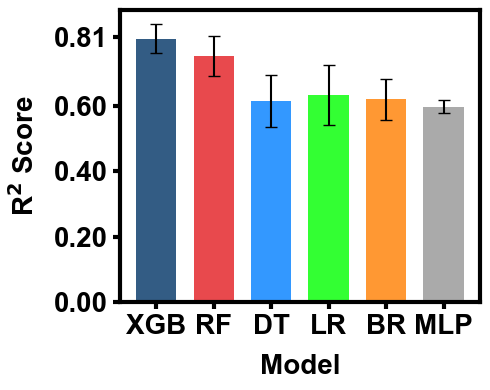

In [33]:
# Create lists for the plot
models = ['XGB', 'RF', 'DT', 'LR', 'BR', 'MLP']
x_pos = np.arange(len(models))

# put the real numbers here

r2_xgb_mean, r2_rf_mean, r2_dt_mean, r2_lr_mean, r2_mlp_mean, r2_br_mean = \
np.mean(r_squareds_global_xgbr), np.mean(r_squareds_global_rfr), np.mean(r_squareds_global_dt),\
np.mean(r_squareds_global_lr), np.mean(r_squareds_global_mlp), np.mean(r_squareds_global_br)  

r2_xgb_std, r2_rf_std, r2_dt_std, r2_lr_std, r2_mlp_std, r2_br_std = \
np.std(r_squareds_global_xgbr), np.std(r_squareds_global_rfr), np.std(r_squareds_global_dt),\
np.std(r_squareds_global_lr), np.std(r_squareds_global_mlp), np.std(r_squareds_global_br)  
# !! should be the same order as models
CTEs = [r2_xgb_mean, r2_rf_mean, r2_dt_mean, r2_lr_mean, r2_br_mean, r2_mlp_mean]
error = [r2_xgb_std, r2_rf_std, r2_dt_std, r2_lr_std, r2_br_std, r2_mlp_std]

# Build the plot
fig, ax = plt.subplots(figsize=(5, 4))
plt.yticks(0.1*np.linspace(0, 8, 5, dtype=int))
ax.tick_params(axis='x', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
ax.tick_params(axis='y', direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')


ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.8, width=0.7,
       ecolor='black', 
       color= ('#003366', '#E31B20', '#007FFF', '#00FF00', '#FF7F00', '#959595'),
       capsize=4)

ax.set_ylabel('$r^2$ Score')
plt.xlabel('Model', fontsize='20', fontname='Arial', fontweight='bold', labelpad=10)
plt.ylabel('R$^2$ Score', fontsize='20', fontname='Arial', fontweight='bold', labelpad=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
#ax.set_title(r'$r^2 Score$')
ax.yaxis.grid(True)
[i.set_linewidth(3) for i in ax.spines.values()]
# Save the figure and show
plt.yticks((0.0, 0.20, 0.40, 0.60, 0.81))
plt.tight_layout()
plt.savefig('./Fig4/fig4a_error_bars_r2.jpeg', dpi=500)

In [34]:
print (r_squareds_global_xgbr)
print ('mean of XGB: ', r2_xgb_mean)
print ('std of XGB: ', r2_xgb_std)

[[0.8652947803160408], [0.7522341334290745], [0.8250618662312317], [0.8297757141835808], [0.7536090481914888]]
mean of XGB:  0.8051951084702832
std of XGB:  0.04489287535797967


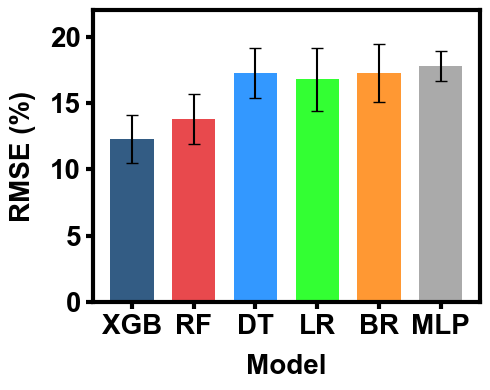

In [35]:
## RMSE of 6 tested Regressors 
# Create lists for the plot
models = ['XGB', 'RF', 'DT', 'LR', 'BR', 'MLP']
x_pos = np.arange(len(models))

# RMSE mean
RMSE_xgb_mean, RMSE_rf_mean, RMSE_dt_mean, RMSE_br_mean, RMSE_lr_mean, RMSE_mlp_mean= \
np.mean(RMSEs_global_xgbr), np.mean(RMSEs_global_rfr), np.mean(RMSEs_global_dt),\
np.mean(RMSEs_global_br), np.mean(RMSEs_global_lr), np.mean(RMSEs_global_mlp) 

# RMSE std
RMSE_xgb_std, RMSE_rf_std, RMSE_dt_std, RMSE_br_std, RMSE_lr_std, RMSE_mlp_std= \
np.std(RMSEs_global_xgbr), np.std(RMSEs_global_rfr), np.std(RMSEs_global_dt),\
np.std(RMSEs_global_br), np.std(RMSEs_global_lr), np.std(RMSEs_global_mlp) 

## ! should be the same order as models
CTEs = [RMSE_xgb_mean, RMSE_rf_mean, RMSE_dt_mean, RMSE_lr_mean, RMSE_br_mean, RMSE_mlp_mean]
error = [RMSE_xgb_std, RMSE_rf_std, RMSE_dt_std, RMSE_lr_std, RMSE_br_std, RMSE_mlp_std]

# Build the plot
fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(axis='x', direction='out', length=5, width=3, 
               colors='black', grid_alpha=0, labelsize='20')
ax.tick_params(axis='y', direction='out', length=5, width=3, 
               colors='black', grid_alpha=0, labelsize='20')

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.8, width=0.7,
       ecolor='black', 
       color= ('#003366', '#E31B20', '#007FFF', 
               '#00FF00', '#FF7F00', '#959595'),
       capsize=4)

plt.yticks(np.linspace(0, 20, 5, dtype=int))
ax.set_ylabel('$r^2$ Score')
plt.xlabel('Model', fontsize='20', fontname='Arial', fontweight='bold', labelpad=10)
plt.ylabel('RMSE (%)', fontsize='20', fontname='Arial', fontweight='bold', labelpad=10)
[i.set_linewidth(3) for i in ax.spines.values()]

ax.set_xticks(x_pos)
ax.set_xticklabels(models)
plt.ylim(0,22)
#ax.set_title(r'$r^2 Score$')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.tight_layout()
plt.savefig('./Fig4/fig4b_error_bars_RMSE.jpeg', dpi=500)
plt.show()

In [36]:
r_squareds_global_xgbr

[[0.8652947803160408],
 [0.7522341334290745],
 [0.8250618662312317],
 [0.8297757141835808],
 [0.7536090481914888]]

In [37]:
# XGBoost Regression result for one split
r_squareds_global_xgbr = []
r_squareds_train_global_xgbr = []
importances_global = []
RMSEs_global_xgbr = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()

counter = 0

#### Materials coef. for 3 time-current properties
## material coef. Final_Current_Percent
input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                 Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Final_Current_Percent, test_size=0.2, random_state=global_split_rand)

clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_IfImax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_IfImax: ', pearr[0])

## material coef. I_max normalized
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_I_Max, test_size=0.2, random_state=global_split_rand)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_Imax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_Imax: ', pearr[0])

## material coef.  Norm_charge_tot
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_charge_tot, test_size=0.2, random_state=global_split_rand)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_chargetot: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_chargetot: ', pearr[0])
material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot

#### proxy XGBoost Final_Current_percent
new_features = np.concatenate ((charge_denisty, pulsetime,
                                material_type_I_Finalperc_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                      train_test_split(new_features, Final_Current_Percent, df['Material'],
                                     indices, test_size = 0.20, random_state = global_split_rand)
xgbr_final_I_percent = XGBRegressor(max_depth=5, n_estimators=29, gamma=0.001, 
                       learning_rate=0.10816326530612246, subsample=0.7918351735001041, 
                                       min_child_weight=11, n_jobs=10, random_state=3970)

xgbr_final_I_percent.fit(train_new_features, train_labels)
Final_Current_Percent_predicted = xgbr_final_I_percent.predict(new_features)  
y_pred = xgbr_final_I_percent.predict(test_new_features)
r_squared_Final_Current_test = r2_score(test_labels, y_pred)
#print('r2 score = ', r_squared_Final_Current_test)
pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
#print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

#### proxy XGBoost Norm_I_Max
new_features = np.concatenate ((charge_denisty,
                                pulsetime, material_type_Norm_I_Max_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_I_Max, 
                                       indices, test_size = 0.2, random_state = global_split_rand)  
xgbr_norm_I_max = XGBRegressor(max_depth=5, n_estimators=25, gamma=0.001, 
                       learning_rate=0.1663265306122449, subsample=0.68, 
                                   min_child_weight=12, n_jobs=-1,
                      random_state=5965)

xgbr_norm_I_max.fit(train_new_features, train_labels);
Norm_I_Max_predicted = xgbr_norm_I_max.predict(new_features)
Norm_I_Max_test = xgbr_norm_I_max.predict(test_new_features)
r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
#print('r2 score for test = ', r_squared_Norm_I_Max_test)
pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
#print('pearson r for test= ', pr_Norm_I_Max_test[0])

#### proxy XGBoost Norm_Norm_charge_tot
#print ('#### proxy XGBoost Norm_Norm_charge_tot')
new_features = np.concatenate ((charge_denisty,pulsetime,
                                material_type_Norm_charge_Tot_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_charge_tot, 
                                       indices, test_size = 0.20, random_state = global_split_rand)
xgbr_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.12959183673469388, subsample=0.7684210526315789, 
                                          min_child_weight=7, n_jobs=10, random_state=4719)

xgbr_norm_charge_total.fit(train_new_features, train_labels)
Norm_charge_tot_predicted = xgbr_norm_charge_total.predict(new_features)
Norm_charge_tot_test = xgbr_norm_charge_total.predict(test_new_features)
r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
#print('r2 score for test= ', r_squared_Norm_charge_tot_test)
pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
#print('pearson r for test= ', pr_Norm_charge_tot_test[0])

#### FINAL prediction of Graphene Yield
CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
heat_power = np.array (df['Voltage']*df['Voltage']*
                       (resistance_matrix**-1)*df['PulseTime']*(1e-3)).reshape(-1, 1)
CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                             CB_MC_PA_coef_Norm_I_Max +
                             CB_MC_PA_coef_Norm_charge_tot)/3

material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average

mask = np.ones(X_CB_MC_PA_TCB_ps_res_sa_sp2.shape[1], dtype=bool)
mask[[2]] = False
# excluding Surface area
X_CB_MC_PA_TCB_ps_res_sp2 = X_CB_MC_PA_TCB_ps_res_sa_sp2 [..., mask]
df['temp2_norm'] = [math.log(i, 10) for i in df['temp2']]
new_features = np.concatenate ((charge_denisty, 
                                X_CB_MC_PA_TCB_ps_res_sp2,
                                #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                #material_type_GY_coef,
                                pulsetime,
                                Pretreat_voltage,
                                np.array (df['temp2_norm']).reshape(-1, 1),
                                atmosphere_type,
                                Final_Current_Percent_predicted.reshape(-1, 1),
                                Norm_I_Max_predicted.reshape(-1, 1),
                                Norm_charge_tot_predicted.reshape(-1, 1), 
                                heat_power.reshape(-1, 1)**0.5), axis=1)
test_size = 0.2
indices = np.arange(len(new_features))
labels = Graphene_Yield
train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                      train_test_split(new_features, labels, 
                                       indices, test_size = test_size, random_state=global_split_rand)
r_squareds = list()
importances = list()
r_squareds_randomized_testtrain = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
r2_max = 0
test_split_seed1 = global_split_rand
test_split_seed2 = global_split_rand + 1
test_split_count = test_split_seed2 - test_split_seed1
rep=10
r_squareds = list()
RMSEs_xgbr = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()

xgbr_graphyield = XGBRegressor(max_depth=6, 
                               n_estimators=40, 
                               gamma=0.001, learning_rate=0.08603603603603605, 
                               subsample=0.7757894736842105, min_child_weight=3, 
                                   n_jobs=10, random_state=95807)
# Train the model on training data
xgbr_graphyield.fit(train_new_features, train_labels);
predictions = xgbr_graphyield.predict(test_new_features)
r_squared = r2_score(test_labels, predictions)
r_squareds.append (r_squared)
train_predictions = xgbr_graphyield.predict(train_new_features)
r_squared = r2_score(train_labels, train_predictions)
r_squareds_train.append (r_squared)
RMSEs_xgbr.append (np.sqrt (mean_squared_error(predictions, test_labels)))
importance = list(xgbr_graphyield.feature_importances_)
print ((list(reversed((np.sort(importance))))))
print (importance[6])
importances.append (importance)
#m = tf.keras.metrics.RootMeanSquaredError()
pred_test = predictions
#m.update_state(pred_test, test_labels)
#print ('RMSE for test, ', m.result().numpy())
r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
#print ('all r2: ', r_squareds_randomized_testtrain_vec)
r_squareds_global_xgbr.append(r_squareds)
r_squareds_train_global_xgbr.append(r_squareds_train)
RMSEs_global_xgbr.append (RMSEs_xgbr)
list_glob_rand_state.append(global_split_rand)
importances_global.append (importances)
counter += 1
print (RMSEs_global_xgbr)
print (r_squareds_global_xgbr)

[0.27515867, 0.13582242, 0.12881938, 0.06487549, 0.05744521, 0.05196426, 0.049554307, 0.0468641, 0.046194565, 0.042537708, 0.042287514, 0.030047271, 0.02842905]
0.05744521
[[10.862496740935065]]
[[0.8652947803160408]]


In [38]:
print (np.mean (train_labels))
print (np.mean (test_labels))

53.33360024782609
56.89369006857143


In [39]:
feature_list = ['charge_denisty',
                'material_ps',
                'material_res',
                #'material_sa',
                'material_sp2',
                'PulseTime',
                'Pretreat_voltage',
                'Temp',
                'Atmosphere_air',
                'Atmosphere_arg',
                'Final_Current_Percent',
                'Norm_I_Max',
                'Norm_charge_tot',
                'heat_power']
print (feature_list)
print ('min: ', list (np.round (np.min (new_features, axis=0), 1)))
print ('max: ', list (np.round (np.max (new_features, axis=0), 1)))

['charge_denisty', 'material_ps', 'material_res', 'material_sp2', 'PulseTime', 'Pretreat_voltage', 'Temp', 'Atmosphere_air', 'Atmosphere_arg', 'Final_Current_Percent', 'Norm_I_Max', 'Norm_charge_tot', 'heat_power']
min:  [19.9, 45.0, 0.4, 30.6, 30.0, 0.0, 2.5, 0.0, 0.0, 0.0, 228.4, 11.4, 8.9]
max:  [204.4, 150.0, 7.2, 45.9, 1200.0, 400.0, 3.8, 1.0, 1.0, 0.7, 2406.8, 106.3, 246.0]


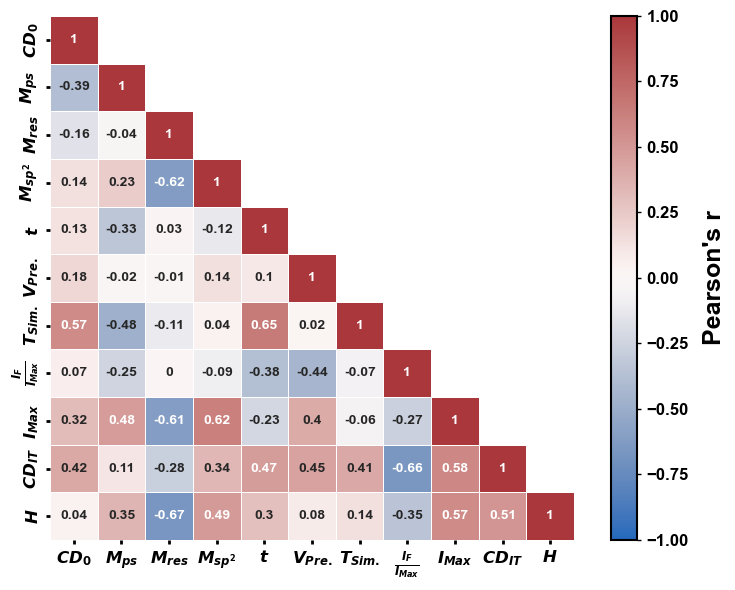

In [40]:
df_corr = pd.DataFrame({})
df_corr ['$CD_0$'] = charge_denisty.ravel()
df_corr ['$M_{ps}$'] = X_CB_MC_PA_TCB_ps_res_sa_sp2[:, 0]
df_corr ['$M_{res}$'] = X_CB_MC_PA_TCB_ps_res_sa_sp2[:, 1]
#df_corr ['$M_{sa}$'] = X_CB_MC_PA_TCB_ps_res_sa_sp2[:, 2]
df_corr ['$M_{sp^2}$'] = X_CB_MC_PA_TCB_ps_res_sa_sp2[:, 3]
df_corr ['$t$'] = pulsetime
df_corr [r'$V_{Pre.}$'] = Pretreat_voltage
df_corr ['$T_{Sim.}$'] = np.array (df['temp2']).reshape(-1, 1)/1000
df_corr [r'$\frac{I_F}{I_{Max}}$'] = Final_Current_Percent_predicted.reshape(-1, 1)
df_corr ['$I_{Max}$'] = Norm_I_Max_predicted.reshape(-1, 1)
df_corr ['$CD_{IT}$'] = Norm_charge_tot_predicted.reshape(-1, 1)
df_corr ['$H$']= heat_power.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(8, 6))                          
matrix = df_corr.corr(
    method = 'pearson',  # The method of correlation
    min_periods = 1      # Min number of observations required
).round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool), k=1)

cbar_kws = {"shrink": 1, "label":"Pearson's r", }#"labelsize":'12'}

ax2 = sns.heatmap(matrix, 
                 annot=True, cbar=True,
                 vmax=1, vmin=-1, center=0, cmap='vlag', linewidth=0.5, square=True,
                 mask=mask, cbar_kws=cbar_kws)

ax.figure.axes[-1].set_ylabel("Pearson's r", size=18, fontname='Arial', 
                              fontweight='bold', labelpad=10)
ax.figure.axes[-1].tick_params(direction='out', length=3, width=1, colors='black', grid_alpha=0, labelsize='12')
[i.set_linewidth(1.5) for i in ax.figure.axes[-1].spines.values()]
"""
cb = fig.colorbar(p, ax=ax)
cb.set_label('Charge Density (C/g)', fontsize='20', fontname='Arial', 
             fontweight='bold', labelpad=10)
cb.ax.tick_params(labelsize=14)
cb.ax.tick_params(axis='both', which='major', labelsize=20, width=2)
[i.set_linewidth(1.5) for i in cb.ax.spines.values()]

"""
ax.set(xlabel="", ylabel="")
ax.tick_params(axis='x', direction='out', length=3, width=2, colors='black', grid_alpha=0, labelsize='12')
ax.tick_params(axis='y', direction='out', length=3, width=2, colors='black', grid_alpha=0, labelsize='12')
plt.tight_layout()
plt.savefig('./Fig5/fig5a_corr_map.jpeg', dpi=500)

In [41]:
feature_list = ['charge_denisty',
                'material_ps',
                'material_res',
                #'material_sa',
                'material_sp2',
                'PulseTime',
                'Pretreat_voltage',
                'Temp',
                'Atmosphere_air',
                'Atmosphere_arg',
                'Final_Current_Percent',
                'Norm_I_Max',
                'Norm_charge_tot',
                'heat_power']

# need graphviz to generate a sampel tree
"""
for i in range(1, 2):
    plot_tree(xgbr_graphyield, num_trees=i, # fontsize=20,
              feature_names=feature_list)#filled=True)#rankdir='LR',)

    plt.savefig('tree_plot{}.jpeg'.format(i), dpi=2000)
"""

"\nfor i in range(1, 2):\n    plot_tree(xgbr_graphyield, num_trees=i, # fontsize=20,\n              feature_names=feature_list)#filled=True)#rankdir='LR',)\n\n    plt.savefig('tree_plot{}.jpeg'.format(i), dpi=2000)\n"

In [42]:
feature_list = ['charge_denisty',
                'material_ps',
                'material_res',
                'material_sp2',
                'PulseTime',
                'Pretreat_voltage',
                'Temp',
                'Atmosphere_air',
                'Atmosphere_arg',
                'Final_Current_Percent',
                'Norm_I_Max',
                'Norm_charge_tot',
                'heat_power']

importances = list(xgbr_graphyield.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
#feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(feature, importance)) 
 for (feature, importance) in zip(feature_list, feature_importances)];

Variable: charge_denisty Importance: ('charge_denisty', 0.28)
Variable: material_ps Importance: ('material_ps', 0.14)
Variable: material_res Importance: ('material_res', 0.05)
Variable: material_sp2 Importance: ('material_sp2', 0.04)
Variable: PulseTime Importance: ('PulseTime', 0.03)
Variable: Pretreat_voltage Importance: ('Pretreat_voltage', 0.05)
Variable: Temp Importance: ('Temp', 0.06)
Variable: Atmosphere_air Importance: ('Atmosphere_air', 0.03)
Variable: Atmosphere_arg Importance: ('Atmosphere_arg', 0.04)
Variable: Final_Current_Percent Importance: ('Final_Current_Percent', 0.13)
Variable: Norm_I_Max Importance: ('Norm_I_Max', 0.05)
Variable: Norm_charge_tot Importance: ('Norm_charge_tot', 0.06)
Variable: heat_power Importance: ('heat_power', 0.05)


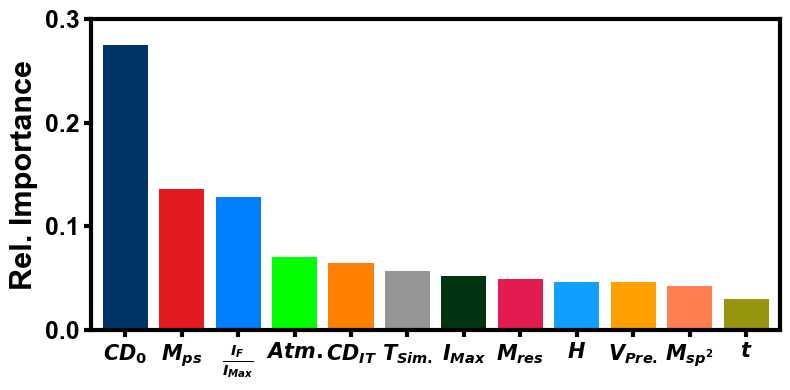

In [43]:
# Create lists for the plot
# including the error bar
feature_list_abbrev0 = ['$CD_0$',
                '$M_{ps}$',
                '$M_{res}$',
                '$M_{sp^2}$',
                '$t$',
                r'$V_{Pre.}$',
                '$T_{Sim.}$',
                'Atmtype',
                'Atmtype2',
                r'$\frac{I_F}{I_{Max}}$',
                '$I_{Max}$',
                '$CD_{IT}$',
                '$H$']
importances_global = np.array (importances_global).ravel()
feature_list_abbrev = np.tile ((feature_list_abbrev0), 5)

data_importance = pd.DataFrame({})
data_importance ['importance'] = importances_global
data_importance ['feature'] = feature_list_abbrev0

# combine air and arg together, remove M_SA with 0 importance

air_importance = np.array (data_importance['importance'].loc[data_importance['feature']=='Atmtype'])
arg_importance = np.array (data_importance['importance'].loc[data_importance['feature']=='Atmtype2'])
data_importance_atmcomb = data_importance.copy()

air_importance = np.array (data_importance['importance'].loc[data_importance['feature']=='Atmtype'])
arg_importance = np.array (data_importance['importance'].loc[data_importance['feature']=='Atmtype2'])
atm_importance = np.add (air_importance, arg_importance)
for i in atm_importance:
    data_importance_atmcomb.loc[len(data_importance_atmcomb.index)] = [i, '$Atm.$']
    
data_importance_atmcomb = data_importance_atmcomb[data_importance_atmcomb.feature != 'Atmtype']
data_importance_atmcomb = data_importance_atmcomb[data_importance_atmcomb.feature != 'Atmtype2']


data_importance_atmcomb = data_importance_atmcomb[data_importance_atmcomb.feature != '$M_{sa}$']

imp_mean = data_importance_atmcomb.groupby('feature').mean()
imp_std = data_importance_atmcomb.groupby('feature').std()


imp_std = imp_std.rename(columns={"importance": "sd"})
imp_mean_sorted = imp_mean.sort_values (by=['importance'], ascending=False)
imp_data_mean_sd = pd.merge (imp_mean_sorted, imp_std, on='feature')


features = imp_data_mean_sd.index
#features = imp_data_mean_sd['feature']
x_pos = np.arange(len(features))

# !! should be the same order as features
features 
CTEs = list (imp_data_mean_sd['importance'].ravel())
error = list (imp_data_mean_sd['sd'].ravel())

# Build the plot
fig, ax = plt.subplots(figsize=(8, 4))
plt.yticks(0.1*np.linspace(0, 8, 5, dtype=int))
ax.tick_params(axis='x', direction='out', length=5, width=3, 
               colors='black', grid_alpha=0, labelsize='15')
ax.tick_params(axis='y', direction='out', length=5, width=3, 
               colors='black', grid_alpha=0, labelsize='18')


ax.bar(x_pos, CTEs, #yerr=error, 
       align='center', 
       alpha=1, width=0.8,
       ecolor='black', 
       color = ('#003366', '#E31B20', '#007FFF', '#00FF00', '#FF7F00', '#959595', 
              '#003310', '#E31B50', '#119FFF', '#FF9F00', '#FF7F50', '#959510'),
       capsize=3)

ax.set_ylabel('$r^2$ Score')
#plt.xticks([i*2 for i in range(6)], labels)

#plt.xlabel('Features', fontsize='22', fontname='Arial', fontweight='bold', labelpad=0)
plt.ylabel('Rel. Importance', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_xticks(x_pos)
ax.set_xticklabels(features)
#ax.set_title(r'$r^2 Score$')
ax.yaxis.grid(True)
[i.set_linewidth(3) for i in ax.spines.values()]
# Save the figure and show
plt.yticks((0.0, 0.1, 0.2, 0.3,))
#plt.ylim(0, 0.31)
plt.xlim(-0.6, 11.6)
plt.tight_layout()
#
plt.savefig('./Fig5/fig5b_importance_plt.jpeg', dpi=500)

In [44]:
imp_mean_sorted

,importance
feature,
$CD_0$,0.275159
$M_{ps}$,0.135822
$\frac{I_F}{I_{Max}}$,0.128819
$Atm.$,0.070967
$CD_{IT}$,0.064875
$T_{Sim.}$,0.057445
$I_{Max}$,0.051964
$M_{res}$,0.049554
$H$,0.046864


(45.714285714285715, 22.857142857142858, 11.428571428571429, 14.285714285714285, 5.714285714285714)


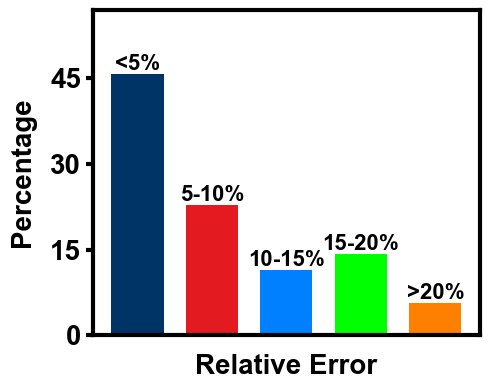

In [45]:
# make the numbers on axis bold
from matplotlib import rc, rcParams
error_group = ['<5%', '5-10%', '10-15%', '15-20%', '>20%']

abs_err = np.abs(pred_test.reshape(-1, 1)-test_labels.reshape(-1, 1))
less_5 = abs_err [abs_err <= 5]
larger_5 = abs_err [abs_err > 5]
larger_5_less_10 = larger_5 [larger_5 <= 10]
larger_10 = abs_err [abs_err > 10]
larger_10_less_15 = larger_10 [larger_10 <= 15]

larger_15 = abs_err [abs_err > 15]
larger_15_less_20 = larger_15 [larger_15 <= 20]
larger_20 = abs_err [abs_err > 20]
n_test = pred_test.shape[0]


#rc('font', weight='bold')
plt.close()
plt.figure(figsize = (5, 4))
frequencies = [less_5.shape[0]/n_test*100, larger_5_less_10.shape[0]/n_test*100, 
               larger_10_less_15.shape[0]/n_test*100, larger_15_less_20.shape[0]/n_test*100, 
               larger_20.shape[0]/n_test*100]

print ( ((less_5.shape[0]/n_test*100, larger_5_less_10.shape[0]/n_test*100, 
               larger_10_less_15.shape[0]/n_test*100, larger_15_less_20.shape[0]/n_test*100, 
               larger_20.shape[0]/n_test*100)))
freq_series = pd.Series(frequencies)
ax = freq_series.plot(kind='bar', width=0.7,
                      color = ['#003366', '#E31B20', '#007FFF', '#00FF00', '#FF7F00', '#959595'])

rects = ax.patches
x_labels = [ ]
labels = ['<5%', '5-10%', '10-15%', '15-20%', '>20%']

ax.tick_params(axis='x', direction='out', length=0, width=3, 
               colors='black', grid_alpha=0, labelsize='20')
ax.tick_params(axis='y', direction='out', length=5, width=3, 
               colors='black', grid_alpha=0, labelsize='20')

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, fontsize = 16, fontweight='bold',
            ha='center', va='bottom')
ax.set_xticklabels(x_labels)
plt.ylim(0, 57)
[i.set_linewidth(3) for i in ax.spines.values()]
plt.yticks([0, 15,  30, 45], fontsize = 20)
plt.ylabel("Percentage", fontsize=20, fontweight='bold', fontname='Arial', labelpad=10)
plt.xlabel("Relative Error", fontsize=20, fontweight='bold', fontname='Arial', labelpad=10)
plt.tight_layout()
plt.savefig('./Fig4/fig4d_err_dist.jpeg', dpi=500, bbox_inches='tight')

In [46]:
pred_test = xgbr_graphyield.predict(test_new_features)
errors_test = (pred_test.reshape(-1, 1) - test_labels)
errors_abs_test = abs(pred_test.reshape(-1, 1) - test_labels)
id_errors = list(range(errors_test.shape[0]))
#plt.plot(id_errors, errors_test, c=id_test)

df_test = df.loc[idx_test]
df_test['id_errors'] = id_errors
df_test['errors'] = errors_test
df_test['abs_errors'] = errors_abs_test
df_test['Graphene_Yield_per'] = df_test['Graphene_Yield']
df_test['y_pred'] = pred_test
df_test['y_true'] = test_labels

In [47]:
np.array (df['Graphene_Yield']).ravel().shape

(173,)

In [48]:
pred_train = xgbr_graphyield.predict(new_features)
errors_train = (pred_train.reshape(-1, 1) - np.array (df['Graphene_Yield']).reshape (-1, 1))
errors_abs_train = abs(pred_train.reshape(-1, 1) - np.array (df['Graphene_Yield']).reshape (-1, 1))
id_errors = list(range(errors_train.shape[0]))
#plt.plot(id_errors, errors_train, c=id_train)

df['id_errors'] = id_errors
df['errors'] = errors_train
df['abs_errors'] = errors_abs_train
df['Graphene_Yield_per'] = df['Graphene_Yield']
df['y_pred'] = pred_train
df['y_true'] = np.array (df['Graphene_Yield']).reshape (-1, 1)

Correlation between error and GY PearsonRResult(statistic=-0.6098451316330094, pvalue=0.00010058661077154952)


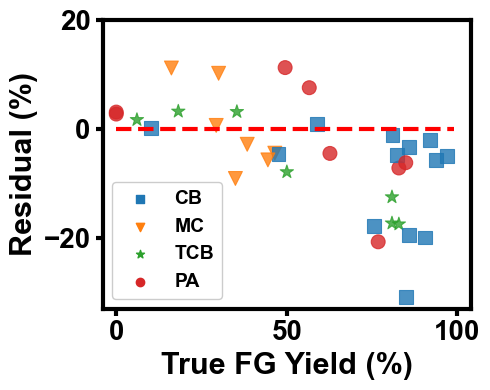

In [49]:
print ('Correlation between error and GY', 
       pearsonr(df_test['errors'].ravel(), df_test['y_true'].ravel()))
# Plot
fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
markers = ['v',  's', 'o', '*']
sns.scatterplot(data=df_test, x='y_true', y='errors',
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor=None,
                style='Material', alpha=0.8, s=100)

plt.legend(fontsize=14, framealpha=1)
plt.xticks((0, 50, 100))
x = list(range(0, 100))
y = np.repeat(0, 100)
plt.xlim (-4, 104)

plt.plot(x, y, linestyle='--', color='red', linewidth='3')
ax.set_xlabel('True FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold')
ax.set_ylabel('Residual (%)', fontsize='22', fontname='Arial', fontweight='bold')
[i.set_linewidth(3) for i in ax.spines.values()]
#plt.ylim(-21, 33)
plt.yticks((-20, 0, 20))

plt.tight_layout()
plt.savefig('./Fig_SI_all/figS5b_resVSGY_test.jpeg', dpi=500)

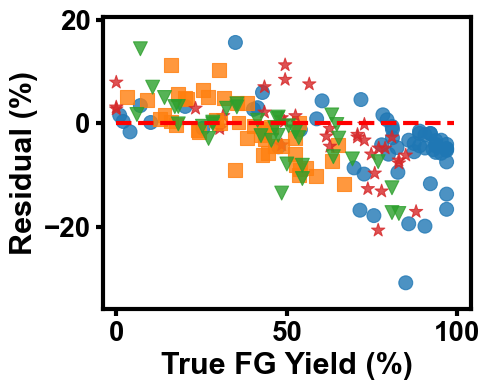

In [50]:
# Plot
labels = Graphene_Yield
predictions = xgbr_graphyield.predict(new_features)
errors_all = (predictions.reshape(-1, 1) - labels)
df['errors'] = errors_all
df['abs_errors'] = abs(errors_all)
df['Graphene_Yield_per'] = df['Graphene_Yield']

fig, ax = plt.subplots(figsize=(5,4))
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
markers = ['o', 's', '*', 'v']
colors=['blue', 'red', 'green', 'orange']
colors2 = ['maroon', 'darkorange', 'goldenrod', 'dodgerblue']

sns.scatterplot(data=df, x='Graphene_Yield', y='errors',
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor=None,
                style='Material', alpha=0.8, s=100)

plt.legend(fontsize=12)
[i.set_linewidth(3) for i in ax.spines.values()]
ax.set_xlabel('True FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold')
ax.set_ylabel('Residual (%)', fontsize='22', fontname='Arial', fontweight='bold')
plt.xlim (-4, 104)
plt.ylim (min(df ['errors'])-5, max(df ['errors'])+5)
x2 = list(range(0, 100))
y2 = np.repeat(0, 100)
plt.plot(x2, y2, linestyle='--', color='red', linewidth='3')
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.savefig('./Fig_SI_all/figS5a_resVSGY.jpeg', dpi=500)

r2 value:  0.8652947803160408


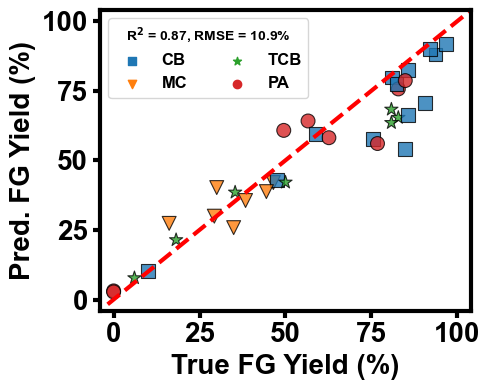

In [51]:
groups = df_test.groupby(['Material'])
# Plot
fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
counter=0
markers = ['v', 's', 'o', '*']
colors=['blue', 'red', 'green', 'orange']
sns.scatterplot(data=df_test, x='y_true', y='y_pred', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor='black',
                style='Material', alpha=0.8, s=100)

#plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Pred. FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold')
ax.set_xlabel('True FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold')
[i.set_linewidth(3) for i in ax.spines.values()]
ymin, ymax = plt.ylim()
ax.set_xlim(ymin, ymax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)

r2 = r2_score (df_test['y_true'], df_test['y_pred']) 
ax.plot(x2, y2, linestyle='--', linewidth = '3', color='red')
leg = plt.legend(frameon="True", prop={'family': 'Arial'})

rmse = np.sqrt (mean_squared_error(df_test['y_pred'], df_test['y_true']))

ax.legend(title='R$^2$ = {}, RMSE = {}%'.format(round(r2, 2), round (rmse, 1)), 
          frameon=True, ncol=2, fontsize=12,)
plt.xlim (-4, 104)
plt.ylim (-4, 104)
plt.xticks((0, 25, 50, 75, 100))
plt.yticks((0, 25, 50, 75, 100))
# Save
print ('r2 value: ', r2_score (df_test['y_true'], df_test['y_pred']))
plt.tight_layout()
plt.savefig('./Fig4/fig4c_XGBPerformance_matg.jpeg', dpi=500)

In [52]:
# normalize the temperature
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
# get the log10 of the temperature results.
df_test['temp2_norm'] = [math.log(i, 10) for i in df_test['temp2']]
#math.log10(np.array (df_test['temp2']))
df['temp2_norm'] = [math.log(i, 10) for i in df['temp2']]
#math.log10(np.array (df_test['temp2']))

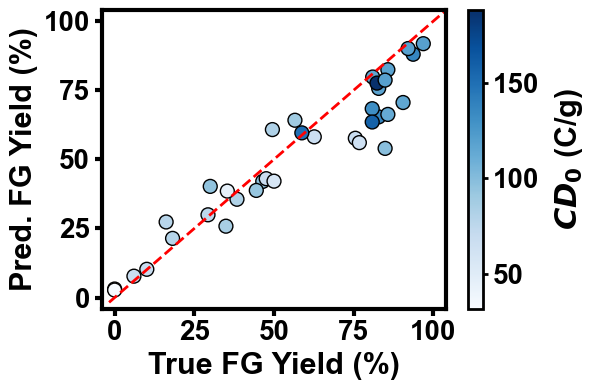

In [53]:
# Coloring by input charge density (CD_0)
# Plot pred vs. true values for test set, coloring the charge density
groups = df_test.groupby(['Material'])
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='out', length=5, width=3, colors='black', 
               grid_alpha=0, labelsize='20')

"""
for name, group in groups:
    p = ax.scatter(group.y_true, group.y_pred,  c=group.charge_density, marker='o', s=100, cmap='Reds')
"""
p = plt.scatter (df_test['y_true'], 
             df_test['y_pred'], 
             c=df_test['charge_density'], s=100, edgecolors='black',
            cmap='Blues')
#plt.colorbar()
    
cb = fig.colorbar(p, ax=ax)
cb.set_label('$CD_0$ (C/g)', fontsize='22', fontname='Arial', 
             fontweight='bold', labelpad=10)
cb.ax.tick_params(labelsize=14)
cb.ax.tick_params(axis='both', which='major', labelsize=20, width=2)
[i.set_linewidth(2) for i in cb.ax.spines.values()]

# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('True FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold')
ax.set_ylabel('Pred. FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.xticks((0, 25, 50, 75, 100))
plt.yticks((0, 25, 50, 75, 100))
plt.xlim (-4, 104)
plt.ylim (-4, 104)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '2', color='red')
# ax.legend(fontsize=12)
[i.set_linewidth(3) for i in ax.spines.values()]


plt.tight_layout()
plt.savefig('./Fig5/fig5c_XGBR_colorCD2.jpeg', dpi=500)

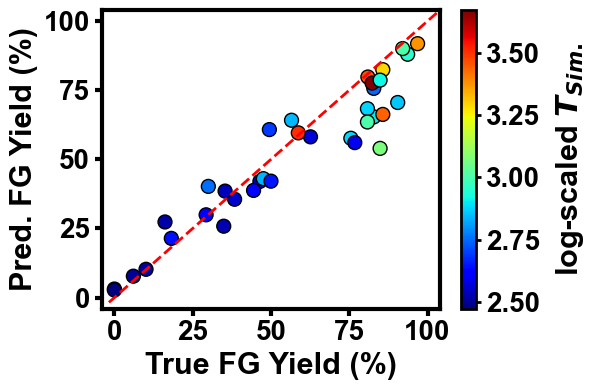

In [54]:
# Coloring based on sim. Temp.
# Plot pred vs. true values for test set, coloring the charge density
groups = df_test.groupby(['Material'])
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, 
               labelsize='20')

"""
for name, group in groups:
    p = ax.scatter(group.y_true, group.y_pred,  c=group.charge_density, 
    marker='o', s=100, cmap='Reds')
"""
p = plt.scatter (df_test['y_true'], 
             df_test['y_pred'], s=100,
             c=df_test['temp2_norm'], edgecolors='black',
             cmap='jet')
#plt.colorbar()
    
cb = fig.colorbar(p, ax=ax)
cb.set_label('log-scaled $T_{Sim.}$', fontsize='22', fontname='Arial', 
             fontweight='bold', labelpad=10)
cb.ax.tick_params(labelsize=14)
cb.ax.tick_params(axis='both', which='major', labelsize=20, width=2)
[i.set_linewidth(2) for i in cb.ax.spines.values()]

# plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_xlabel('True FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold')
ax.set_ylabel('Pred. FG Yield (%)', fontsize='22', fontname='Arial', fontweight='bold')
ymin, ymax = plt.ylim()
xmin, xmax = plt.xlim()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.xticks((0, 25, 50, 75, 100))
plt.yticks((0, 25, 50, 75, 100))
plt.xlim (-4, 104)
plt.ylim (-4, 104)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)
ax.plot(x2,y2, linestyle='--', linewidth = '2', color='red')
# ax.legend(fontsize=12)
[i.set_linewidth(3) for i in ax.spines.values()]


plt.tight_layout()
plt.savefig('./Fig5/fig5d_XGBR_colortemp.jpeg', dpi=500)
plt.show()

proxy XGBoost Final_Current_percent
Pearson r for test samples=  0.755648726671037
proxy XGBoost Norm_I_Max
pearson r for test=  0.7686014106068022
proxy XGBoost Norm_Norm_charge_tot
pearson r for test=  0.7813254073044695


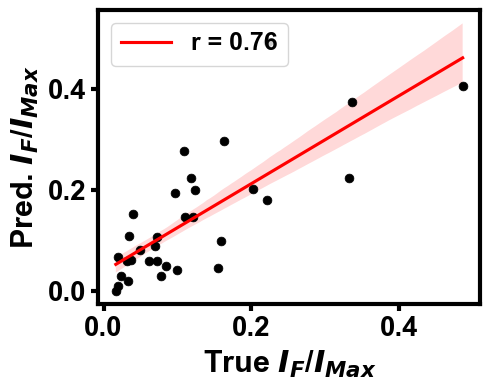

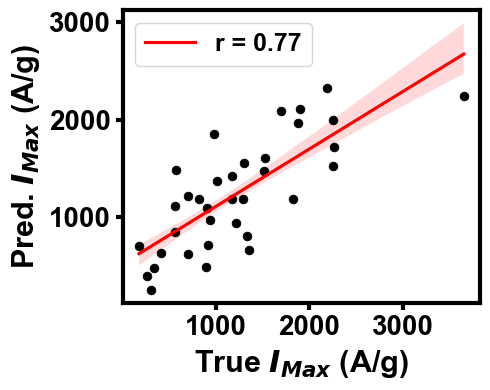

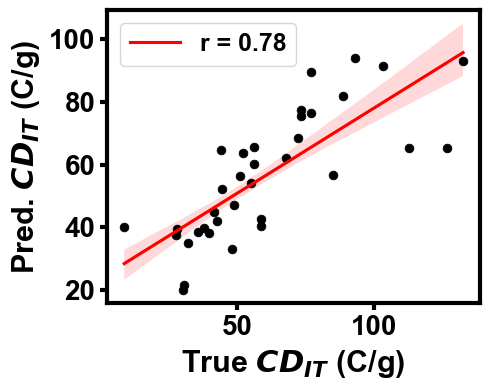

In [55]:
# XGBoost Regression result for the global split
# corr. of I-t derived properties 
r_squareds_global_xgbr = []
RMSEs_global_xgbr = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()

#### Materials coef. for 3 time-current properties
#print ('#### material coef. for 3 current properties')
## material coef. Final_Current_Percent
input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                 Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Final_Current_Percent, test_size=0.2, random_state=7)

clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_IfImax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_IfImax: ', pearr[0])

## material coef. I_max normalized
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_I_Max, test_size=0.2, random_state=7)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_Imax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_Imax: ', pearr[0])

## material coef.  Norm_charge_tot
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_charge_tot, test_size=0.2, random_state=7)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_chargetot: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_chargetot: ', pearr[0])
material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot

#### proxy XGBoost Final_Current_percent
print ('proxy XGBoost Final_Current_percent')
new_features = np.concatenate ((charge_denisty, pulsetime,
                                material_type_I_Finalperc_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                      train_test_split(new_features, Final_Current_Percent, df['Material'],
                                     indices, test_size = 0.20, random_state = glob_split)
xgbr_final_I_percent = XGBRegressor(max_depth=7, n_estimators=43, gamma=0.001, 
                       learning_rate=0.216326530612246, subsample=0.79, 
                                       min_child_weight=11, n_jobs=10,
                       random_state=100)

xgbr_final_I_percent.fit(train_new_features, train_labels)
Final_Current_Percent_predicted = xgbr_final_I_percent.predict(new_features)  
y_pred = xgbr_final_I_percent.predict(test_new_features)
r_squared_Final_Current_test = r2_score(test_labels, y_pred)
#print('r2 score = ', r_squared_Final_Current_test)
pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

fig, ax = plt.subplots(figsize=(5, 4))
data = pd.DataFrame(())
data['y_pred'] = y_pred
data['y_true'] = test_labels
data['material'] = df['Material']
# removed outliers
data_outlier_removed = data.loc[data['y_pred'] > 0]
#order is greater than 1, use numpy.polyfit to estimate a polynomial regression.
#sns.regplot(data=data_outlier_removed, x='y_test', y='y_pred', ci=70, order=2)
sns1 = sns.regplot(data=data_outlier_removed, x='y_true', y='y_pred',
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ci=70, order=1, label='r = {}'.format(round(pearsonr_Final_Current_test[0], 2)), scatter=False)

sns.scatterplot(data=data_outlier_removed, x='y_true', y='y_pred',
                      edgecolor=None, s=40, color='black')
sns1.legend(loc='upper left', fontsize=18)

ax.set_ylabel('Pred. $I_{F}$/$I_{Max}$', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_xlabel('True $I_{F}$/$I_{Max}$', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
[i.set_linewidth(3) for i in ax.spines.values()]
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
#plt.yticks((0.1, 0.3, 0.5))
#plt.xticks((0.1, 0.5, 0.9))

plt.tight_layout()
plt.savefig('./Fig3/fig3c_pred_IfinalImax.jpeg', dpi=500)

#### proxy XGBoost Norm_I_Max
print ('proxy XGBoost Norm_I_Max')
new_features = np.concatenate ((charge_denisty,
                                pulsetime, material_type_Norm_I_Max_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_I_Max, 
                                       indices, test_size = 0.2, random_state=7)  
xgbr_norm_I_max = XGBRegressor(max_depth=3, n_estimators=30, gamma=0.001, 
                       learning_rate=0.1663265306122449, subsample=0.75, 
                                   min_child_weight=12, n_jobs=10,
                      random_state=5965)

xgbr_norm_I_max.fit(train_new_features, train_labels);
Norm_I_Max_predicted = xgbr_norm_I_max.predict(new_features)
Norm_I_Max_test = xgbr_norm_I_max.predict(test_new_features)
r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
#print('r2 score for test = ', r_squared_Norm_I_Max_test)
pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
print('pearson r for test= ', pr_Norm_I_Max_test[0])
# plot pred. vs. true value
fig, ax = plt.subplots(figsize=(5, 4))
data = pd.DataFrame(())
data['y_pred'] = Norm_I_Max_test
data['y_true'] = test_labels 
data['material'] = df['Material']
# removed outliers
data_outlier_removed = data.loc[data['y_true'] > 0]
#order is greater than 1, use numpy.polyfit to estimate a polynomial regression.
#sns.regplot(data=data_outlier_removed, x='y_test', y='y_pred', ci=70, order=2)

sns1 = sns.regplot(data=data_outlier_removed, x='y_true', y='y_pred',
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ci=70, order=1, label='r = {}'.format(round(pr_Norm_I_Max_test[0], 2)), scatter=False)

sns.scatterplot(data=data_outlier_removed, x='y_true', y='y_pred',
                      edgecolor=None, s=40, color='black')
sns1.legend(loc='upper left', fontsize=18)

ax.set_ylabel('Pred. $I_{Max}$ (A/g)', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
ax.set_xlabel('True $I_{Max}$ (A/g)', fontsize='22', fontname='Arial', fontweight='bold', labelpad=5)
[i.set_linewidth(3) for i in ax.spines.values()]
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
#plt.xticks((500, 1000, 1500, 2000))
#plt.yticks((500, 1000, 1500, 2000))

plt.tight_layout()
plt.savefig('./Fig3/fig3b_pred_norm_Imax.jpeg', dpi=500)

#### proxy XGBoost Norm_charge_tot
print ('proxy XGBoost Norm_Norm_charge_tot')
#print ('#### proxy XGBoost Norm_Norm_charge_tot')
new_features = np.concatenate ((charge_denisty,pulsetime,
                                material_type_Norm_charge_Tot_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_charge_tot, 
                                       indices, test_size = 0.20, random_state=7)
xgbr_norm_charge_total = XGBRegressor(max_depth=3, n_estimators=30, gamma=0.001, 
                   learning_rate=0.12959183673469388, subsample=0.7684210526315789, 
                                          min_child_weight=7, n_jobs=10, random_state=4719)

xgbr_norm_charge_total.fit(train_new_features, train_labels)
Norm_charge_tot_predicted = xgbr_norm_charge_total.predict(new_features)
Norm_charge_tot_test = xgbr_norm_charge_total.predict(test_new_features)
r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
#print('r2 score for test= ', r_squared_Norm_charge_tot_test)
pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
print('pearson r for test= ', pr_Norm_charge_tot_test[0])

fig, ax = plt.subplots(figsize=(5, 4))
data = pd.DataFrame(())
data['y_pred'] = Norm_charge_tot_test
data['y_true'] = test_labels 
data['material'] = df['Material']
# removed outliers
data_outlier_removed = data.loc[data['y_true'] > 0]
#order is greater than 1, use numpy.polyfit to estimate a polynomial regression.
sns1 = sns.regplot(data=data_outlier_removed, x='y_true', y='y_pred',
            scatter_kws={"color": "black"}, line_kws={"color": "red"},
            ci=70, order=1, label='r = {}'.format(round(pr_Norm_charge_tot_test[0], 2)), scatter=False)

sns.scatterplot(data=data_outlier_removed, x='y_true', y='y_pred',
                      edgecolor=None, s=40, color='black')
sns1.legend(loc='upper left', fontsize=18)

#plt.legend(['r = {}'.format(round(pr_Norm_charge_tot_test[0], 2))], frameon=True, loc='upper left')
ax.set_ylabel('Pred. $CD_{IT}$ (C/g)', fontsize='22', fontname='Arial', 
              fontweight='bold', labelpad=5)
ax.set_xlabel('True $CD_{IT}$ (C/g)', fontsize='22', fontname='Arial', 
              fontweight='bold', labelpad=5)
[i.set_linewidth(3) for i in ax.spines.values()]
ax.tick_params(direction='out', length=5, width=3, 
               grid_alpha=0, labelsize='20')
"""
plt.title("Pearson's r = {}".format(round(pr_Norm_charge_tot_test[0], 2)), 
          loc='left', fontname='Arial', fontsize=22, pad=10,
          fontweight='bold', color='darkred')
"""
#plt.legend(['r = {}'.format(round(pearr[0], 2))], frameon=True, loc='upper left', fontsize=15, )#labelcolor='red')
#plt.xticks((20, 70, 120))
#plt.yticks((20, 70, 120))
#plt.legend(['r = {}'.format(round(pr_Norm_charge_tot_test[0], 2))], frameon=True, loc='upper left')

plt.tight_layout()
plt.savefig('./Fig3/fig3d_pred_norm_total_charge.jpeg', dpi=500)

In [56]:
# XGBoost Regression
# excluding Sim. Temp. from inputs of the final model 
r_squareds_global_xgbr = []
r_squareds_train_global_xgbr = []
importances_global = []
RMSEs_global_xgbr = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()

counter = 0
#### Materials coef. for 3 time-current properties
## material coef. Final_Current_Percent
input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                 Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Final_Current_Percent, test_size=0.2, random_state=global_split_rand)

clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_IfImax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_IfImax: ', pearr[0])

## material coef. I_max normalized
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_I_Max, test_size=0.2, random_state=global_split_rand)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_Imax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_Imax: ', pearr[0])

## material coef.  Norm_charge_tot
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_charge_tot, test_size=0.2, random_state=global_split_rand)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_chargetot: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_chargetot: ', pearr[0])
material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot

#### proxy XGBoost Final_Current_percent
new_features = np.concatenate ((charge_denisty, pulsetime,
                                material_type_I_Finalperc_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                      train_test_split(new_features, Final_Current_Percent, df['Material'],
                                     indices, test_size = 0.20, random_state = global_split_rand)
xgbr_final_I_percent = XGBRegressor(max_depth=5, n_estimators=29, gamma=0.001, 
                       learning_rate=0.10816326530612246, subsample=0.7918351735001041, 
                                       min_child_weight=11, n_jobs=10, random_state=3970)

xgbr_final_I_percent.fit(train_new_features, train_labels)
Final_Current_Percent_predicted = xgbr_final_I_percent.predict(new_features)  
y_pred = xgbr_final_I_percent.predict(test_new_features)
r_squared_Final_Current_test = r2_score(test_labels, y_pred)
#print('r2 score = ', r_squared_Final_Current_test)
pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
#print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

#### proxy XGBoost Norm_I_Max
new_features = np.concatenate ((charge_denisty,
                                pulsetime, material_type_Norm_I_Max_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_I_Max, 
                                       indices, test_size = 0.2, random_state = global_split_rand)  
xgbr_norm_I_max = XGBRegressor(max_depth=5, n_estimators=25, gamma=0.001, 
                       learning_rate=0.1663265306122449, subsample=0.68, 
                                   min_child_weight=12, n_jobs=-1,
                      random_state=5965)

xgbr_norm_I_max.fit(train_new_features, train_labels);
Norm_I_Max_predicted = xgbr_norm_I_max.predict(new_features)
Norm_I_Max_test = xgbr_norm_I_max.predict(test_new_features)
r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
#print('r2 score for test = ', r_squared_Norm_I_Max_test)
pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
#print('pearson r for test= ', pr_Norm_I_Max_test[0])

#### proxy XGBoost Norm_Norm_charge_tot
#print ('#### proxy XGBoost Norm_Norm_charge_tot')
new_features = np.concatenate ((charge_denisty,pulsetime,
                                material_type_Norm_charge_Tot_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_charge_tot, 
                                       indices, test_size = 0.20, random_state = global_split_rand)
xgbr_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.12959183673469388, subsample=0.7684210526315789, 
                                          min_child_weight=7, n_jobs=10, random_state=4719)

xgbr_norm_charge_total.fit(train_new_features, train_labels)
Norm_charge_tot_predicted = xgbr_norm_charge_total.predict(new_features)
Norm_charge_tot_test = xgbr_norm_charge_total.predict(test_new_features)
r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
#print('r2 score for test= ', r_squared_Norm_charge_tot_test)
pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
#print('pearson r for test= ', pr_Norm_charge_tot_test[0])

#### FINAL prediction of Graphene Yield
CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
heat_power = np.array (df['Voltage']*df['Voltage']*
                       (resistance_matrix**-1)*df['PulseTime']*(1e-3)).reshape(-1, 1)
CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                             CB_MC_PA_coef_Norm_I_Max +
                             CB_MC_PA_coef_Norm_charge_tot)/3

material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average

mask = np.ones(X_CB_MC_PA_TCB_ps_res_sa_sp2.shape[1], dtype=bool)
mask[[2]] = False
# excluding Surface area
X_CB_MC_PA_TCB_ps_res_sp2 = X_CB_MC_PA_TCB_ps_res_sa_sp2 [..., mask]
df['temp2_norm'] = [math.log(i, 10) for i in df['temp2']]
new_features = np.concatenate ((charge_denisty, 
                                X_CB_MC_PA_TCB_ps_res_sp2,
                                #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                #material_type_GY_coef,
                                pulsetime,
                                Pretreat_voltage,
                                #np.array (df['temp2_norm']).reshape(-1, 1),
                                atmosphere_type,
                                Final_Current_Percent_predicted.reshape(-1, 1),
                                Norm_I_Max_predicted.reshape(-1, 1),
                                Norm_charge_tot_predicted.reshape(-1, 1), 
                                heat_power.reshape(-1, 1)**0.5), axis=1)
test_size = 0.2
indices = np.arange(len(new_features))
labels = Graphene_Yield
train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                      train_test_split(new_features, labels, 
                                       indices, test_size = test_size, random_state=global_split_rand)
r_squareds = list()
importances = list()
r_squareds_randomized_testtrain = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
r2_max = 0
test_split_seed1 = global_split_rand
test_split_seed2 = global_split_rand + 1
test_split_count = test_split_seed2 - test_split_seed1
rep=10
r_squareds = list()
RMSEs_xgbr = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()

xgbr_graphyield = XGBRegressor(max_depth=6, 
                               n_estimators=40, 
                               gamma=0.001, learning_rate=0.08603603603603605, 
                               subsample=0.7757894736842105, min_child_weight=3, 
                                   n_jobs=10, random_state=95807)
# Train the model on training data
xgbr_graphyield.fit(train_new_features, train_labels);
predictions = xgbr_graphyield.predict(test_new_features)
r_squared = r2_score(test_labels, predictions)
r_squareds.append (r_squared)
train_predictions = xgbr_graphyield.predict(train_new_features)
r_squared = r2_score(train_labels, train_predictions)
r_squareds_train.append (r_squared)
RMSEs_xgbr.append (np.sqrt (mean_squared_error(predictions, test_labels)))
importance = list(xgbr_graphyield.feature_importances_)
print ((list(reversed((np.sort(importance))))))
print (importance[6])
importances.append (importance)
#m = tf.keras.metrics.RootMeanSquaredError()
pred_test = predictions
#m.update_state(pred_test, test_labels)
#print ('RMSE for test, ', m.result().numpy())
r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
#print ('all r2: ', r_squareds_randomized_testtrain_vec)
r_squareds_global_xgbr.append(r_squareds)
r_squareds_train_global_xgbr.append(r_squareds_train)
RMSEs_global_xgbr.append (RMSEs_xgbr)
list_glob_rand_state.append(global_split_rand)
importances_global.append (importances)
counter += 1
print (RMSEs_global_xgbr)
print (r_squareds_global_xgbr)

[0.26936337, 0.13740814, 0.1290702, 0.07047867, 0.06479853, 0.06392304, 0.050912216, 0.049595322, 0.048946377, 0.043301575, 0.042890105, 0.029312493]
0.042890105
[[12.131328373561958]]
[[0.8319874113990491]]


r2 value:  0.8319874113990491


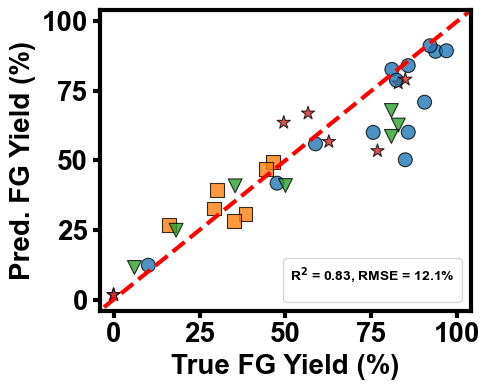

In [57]:
df_test['y_pred'] = pred_test
groups = df_test.groupby(['Material'])
# Plot
fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
counter=0
markers = ['s', 'o', '*', 'v']
colors=['blue', 'red', 'green', 'orange']
sns.scatterplot(data=df_test, x='y_true', y='y_pred', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor='black',
                style='Material', alpha=0.8, s=100)

#plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Pred. FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold')
ax.set_xlabel('True FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold')
[i.set_linewidth(3) for i in ax.spines.values()]
ymin, ymax = plt.ylim()
ax.set_xlim(ymin, ymax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)

r2 = r2_score (df_test['y_true'], df_test['y_pred']) 
ax.plot(x2, y2, linestyle='--', linewidth = '3', color='red')
leg = plt.legend(frameon="True", prop={'family': 'Arial'})

rmse = np.sqrt (mean_squared_error(df_test['y_pred'], df_test['y_true']))

ax.legend( [], title='R$^2$ = {}, RMSE = {}%'.format(round(r2, 2), round (rmse, 1)),  
           frameon=True, ncol=2, fontsize=13, loc='lower right')
plt.xlim (-4, 104)
plt.ylim (-4, 104)
plt.xticks((0, 25, 50, 75, 100))
plt.yticks((0, 25, 50, 75, 100))
# Save
print ('r2 value: ', r2_score (df_test['y_true'], df_test['y_pred']))
plt.tight_layout()
plt.savefig('./Fig4/fig4e_XGBPerformance_notemp.jpeg', dpi=500)

In [58]:
# XGBoost Regression result 
# Excluding both Sim. Temp and current-derived properties
r_squareds_global_xgbr = []
r_squareds_train_global_xgbr = []
importances_global = []
RMSEs_global_xgbr = []
list_glob_rand_state = []
start = time.time()
pbar = ProgressBar()

counter = 0

#### Materials coef. for 3 time-current properties
## material coef. Final_Current_Percent
input_features = np.concatenate((material_matrix, charge_denisty, Init_R, 
                                 Res_Drop, Volt_Drop, Graphene_Yield), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Final_Current_Percent, test_size=0.2, random_state=global_split_rand)

clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Final_Current_Percent = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_IfImax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_IfImax: ', pearr[0])

## material coef. I_max normalized
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 X_CB_MC_PA_TCB_ps_res_sa_sp2[:, (0, 1, 3)],
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_I_Max, test_size=0.2, random_state=global_split_rand)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_I_Max = clf.coef_[0:4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_Imax: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_Imax: ', pearr[0])

## material coef.  Norm_charge_tot
input_features = np.concatenate((material_matrix, Init_R, charge_denisty,
                                 Res_Drop, Volt_Drop), axis=1)
X_train, X_test, y_train, y_test = train_test_split(
        input_features, Norm_charge_tot, test_size=0.2, random_state=global_split_rand)
clf = linear_model.LinearRegression()
clf = clf.fit(X_train, y_train.ravel())
CB_MC_PA_coef_Norm_charge_tot = clf.coef_[0: 4]
y_pred = clf.predict (X_test)
r2 = r2_score(y_test.ravel(), y_pred.ravel())
#print ('r2 mat_chargetot: ', r2)
pearr = pearsonr(y_test.ravel(), y_pred.ravel())
#print ('pearson r mat_chargetot: ', pearr[0])
material_type_I_Finalperc_coef = material_type * CB_MC_PA_coef_Final_Current_Percent
material_type_Norm_I_Max_coef = material_type * CB_MC_PA_coef_Norm_I_Max
material_type_Norm_charge_Tot_coef = material_type * CB_MC_PA_coef_Norm_charge_tot

#### proxy XGBoost Final_Current_percent
new_features = np.concatenate ((charge_denisty, pulsetime,
                                material_type_I_Finalperc_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, train_mat, test_mat, idxtrain, idx_test = \
                      train_test_split(new_features, Final_Current_Percent, df['Material'],
                                     indices, test_size = 0.20, random_state = global_split_rand)
xgbr_final_I_percent = XGBRegressor(max_depth=5, n_estimators=29, gamma=0.001, 
                       learning_rate=0.10816326530612246, subsample=0.7918351735001041, 
                                       min_child_weight=11, n_jobs=10, random_state=3970)

xgbr_final_I_percent.fit(train_new_features, train_labels)
Final_Current_Percent_predicted = xgbr_final_I_percent.predict(new_features)  
y_pred = xgbr_final_I_percent.predict(test_new_features)
r_squared_Final_Current_test = r2_score(test_labels, y_pred)
#print('r2 score = ', r_squared_Final_Current_test)
pearsonr_Final_Current_test = pearsonr(test_labels.ravel(), y_pred.ravel())
#print('Pearson r for test samples= ', pearsonr_Final_Current_test[0])

#### proxy XGBoost Norm_I_Max
new_features = np.concatenate ((charge_denisty,
                                pulsetime, material_type_Norm_I_Max_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_I_Max, 
                                       indices, test_size = 0.2, random_state = global_split_rand)  
xgbr_norm_I_max = XGBRegressor(max_depth=5, n_estimators=25, gamma=0.001, 
                       learning_rate=0.1663265306122449, subsample=0.68, 
                                   min_child_weight=12, n_jobs=-1,
                      random_state=5965)

xgbr_norm_I_max.fit(train_new_features, train_labels);
Norm_I_Max_predicted = xgbr_norm_I_max.predict(new_features)
Norm_I_Max_test = xgbr_norm_I_max.predict(test_new_features)
r_squared_Norm_I_Max_test = r2_score(test_labels, Norm_I_Max_test)
#print('r2 score for test = ', r_squared_Norm_I_Max_test)
pr_Norm_I_Max_test = pearsonr(test_labels.ravel(), Norm_I_Max_test.ravel())
#print('pearson r for test= ', pr_Norm_I_Max_test[0])

#### proxy XGBoost Norm_Norm_charge_tot
#print ('#### proxy XGBoost Norm_Norm_charge_tot')
new_features = np.concatenate ((charge_denisty,pulsetime,
                                material_type_Norm_charge_Tot_coef,
                                atmosphere_type, Pretreat_voltage), axis=1)
indices = np.arange(len(new_features))
train_new_features, test_new_features, train_labels, test_labels, idxtrain, idx_test = \
                      train_test_split(new_features, Norm_charge_tot, 
                                       indices, test_size = 0.20, random_state = global_split_rand)
xgbr_norm_charge_total = XGBRegressor(max_depth=4, n_estimators=30, gamma=0.001, 
                   learning_rate=0.12959183673469388, subsample=0.7684210526315789, 
                                          min_child_weight=7, n_jobs=10, random_state=4719)

xgbr_norm_charge_total.fit(train_new_features, train_labels)
Norm_charge_tot_predicted = xgbr_norm_charge_total.predict(new_features)
Norm_charge_tot_test = xgbr_norm_charge_total.predict(test_new_features)
r_squared_Norm_charge_tot_test = r2_score(test_labels, Norm_charge_tot_test)
#print('r2 score for test= ', r_squared_Norm_charge_tot_test)
pr_Norm_charge_tot_test = pearsonr(test_labels.ravel(), Norm_charge_tot_test.ravel())
#print('pearson r for test= ', pr_Norm_charge_tot_test[0])

#### FINAL prediction of Graphene Yield
CB_MC_PA_TCB_res = CB_MC_PA_TCB_ps_res_sa_sp2 [:, 1]
resistance_matrix = np.matmul(material_matrix, CB_MC_PA_TCB_res)
heat_power = np.array (df['Voltage']*df['Voltage']*
                       (resistance_matrix**-1)*df['PulseTime']*(1e-3)).reshape(-1, 1)
CB_MC_PA_TCB_coef_average = (CB_MC_PA_coef_Final_Current_Percent +
                             CB_MC_PA_coef_Norm_I_Max +
                             CB_MC_PA_coef_Norm_charge_tot)/3

material_type_GY_coef = material_type * CB_MC_PA_TCB_coef_average

mask = np.ones(X_CB_MC_PA_TCB_ps_res_sa_sp2.shape[1], dtype=bool)
mask[[2]] = False
# excluding Surface area
X_CB_MC_PA_TCB_ps_res_sp2 = X_CB_MC_PA_TCB_ps_res_sa_sp2 [..., mask]
df['temp2_norm'] = [math.log(i, 10) for i in df['temp2']]
new_features = np.concatenate ((charge_denisty, 
                                X_CB_MC_PA_TCB_ps_res_sp2,
                                #np.array(df['Volt_Drop']/df['I_Mean']).reshape(-1, 1),
                                #material_type_GY_coef,
                                pulsetime,
                                Pretreat_voltage,
                                #np.array (df['temp2_norm']).reshape(-1, 1),
                                atmosphere_type,
                                #Final_Current_Percent_predicted.reshape(-1, 1),
                                #Norm_I_Max_predicted.reshape(-1, 1),
                                #Norm_charge_tot_predicted.reshape(-1, 1), 
                                heat_power.reshape(-1, 1)**0.5), axis=1)
test_size = 0.2
indices = np.arange(len(new_features))
labels = Graphene_Yield
train_new_features, test_new_features, train_labels, test_labels, idx_train, idx_test = \
                      train_test_split(new_features, labels, 
                                       indices, test_size = test_size, random_state=global_split_rand)
r_squareds = list()
importances = list()
r_squareds_randomized_testtrain = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()
r2_max = 0
test_split_seed1 = global_split_rand
test_split_seed2 = global_split_rand + 1
test_split_count = test_split_seed2 - test_split_seed1
rep=10
r_squareds = list()
RMSEs_xgbr = list()
r_squareds_train = list()
MAEs = list()
MAEs_train = list()

xgbr_graphyield = XGBRegressor(max_depth=6, 
                               n_estimators=40, 
                               gamma=0.001, learning_rate=0.08603603603603605, 
                               subsample=0.7757894736842105, min_child_weight=3, 
                                   n_jobs=10, random_state=95807)
# Train the model on training data
xgbr_graphyield.fit(train_new_features, train_labels);
predictions = xgbr_graphyield.predict(test_new_features)
r_squared = r2_score(test_labels, predictions)
r_squareds.append (r_squared)
train_predictions = xgbr_graphyield.predict(train_new_features)
r_squared = r2_score(train_labels, train_predictions)
r_squareds_train.append (r_squared)
RMSEs_xgbr.append (np.sqrt (mean_squared_error(predictions, test_labels)))
importance = list(xgbr_graphyield.feature_importances_)
print ((list(reversed((np.sort(importance))))))
print (importance[6])
importances.append (importance)
#m = tf.keras.metrics.RootMeanSquaredError()
pred_test = predictions
#m.update_state(pred_test, test_labels)
#print ('RMSE for test, ', m.result().numpy())
r_squareds_randomized_testtrain_vec = np.array ((r_squareds_randomized_testtrain))
#print ('all r2: ', r_squareds_randomized_testtrain_vec)
r_squareds_global_xgbr.append(r_squareds)
r_squareds_train_global_xgbr.append(r_squareds_train)
RMSEs_global_xgbr.append (RMSEs_xgbr)
list_glob_rand_state.append(global_split_rand)
importances_global.append (importances)
counter += 1
print (RMSEs_global_xgbr)
print (r_squareds_global_xgbr)

[0.27602062, 0.1386932, 0.10746013, 0.09354944, 0.087828785, 0.076814316, 0.07651564, 0.07444723, 0.06867068]
0.06867068
[[14.168649925868674]]
[[0.7708171866968853]]


r2 value:  0.7708171866968853


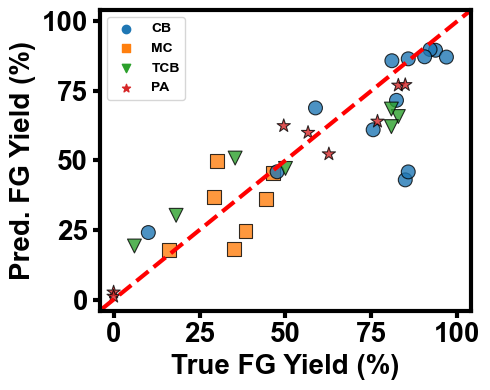

In [59]:
df_test['y_pred'] = pred_test
groups = df_test.groupby(['Material'])
# Plot
fig, ax = plt.subplots(figsize=(5, 4))
ax.tick_params(direction='out', length=5, width=3, colors='black', grid_alpha=0, labelsize='20')
counter=0
markers = ['s', 'o', '*', 'v']
colors=['blue', 'red', 'green', 'orange']
sns.scatterplot(data=df_test, x='y_true', y='y_pred', 
                hue_order= ['CB', 'MC', 'TCB', 'PA'], markers=markers, hue='Material', edgecolor='black',
                style='Material', alpha=0.8, s=100)

#plt.title('Test Data', fontsize='18', fontname='Arial', fontweight='bold')
ax.set_ylabel('Pred. FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold')
ax.set_xlabel('True FG Yield (%)', fontsize='20', fontname='Arial', fontweight='bold')
[i.set_linewidth(3) for i in ax.spines.values()]
ymin, ymax = plt.ylim()
ax.set_xlim(ymin, ymax)
ax.set_ylim(ymin, ymax)
# Make a red line to show perfect predictions
x2 = np.arange(ymin, ymax*1.1, .01)
y2 = np.arange(ymin, ymax*1.1, .01)

r2 = r2_score (df_test['y_true'], df_test['y_pred']) 
ax.plot(x2, y2, linestyle='--', linewidth = '3', color='red')
leg = plt.legend(frameon="True", prop={'family': 'Arial'})

rmse = np.sqrt (mean_squared_error(df_test['y_pred'], df_test['y_true']))

ax.legend( [], title='R$^2$ = {}, RMSE = {}%'.format(round(r2, 2), round (rmse, 1)),  
           frameon=True, ncol=2, fontsize=13, loc='lower right')
plt.xlim (-4, 104)
plt.ylim (-4, 104)
plt.xticks((0, 25, 50, 75, 100))
plt.yticks((0, 25, 50, 75, 100))
# Save
print ('r2 value: ', r2_score (df_test['y_true'], df_test['y_pred']))
plt.tight_layout()
plt.legend()
plt.savefig('./Fig4/fig4f_XGBPerformance_notemp_Nocurrent.jpeg', dpi=500)

In [60]:
print ('Done!')

Done!
